In [1]:
#loading neccesary libraries

import time  

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import datetime as dt


df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

print("Setup complete")

Setup complete


In [2]:
print(df.shape)
df.head().T

(1470, 35)


0                       1  \
Age                                    41                      49   
Attrition                             Yes                      No   
BusinessTravel              Travel_Rarely       Travel_Frequently   
DailyRate                            1102                     279   
Department                          Sales  Research & Development   
DistanceFromHome                        1                       8   
Education                               2                       1   
EducationField              Life Sciences           Life Sciences   
EmployeeCount                           1                       1   
EmployeeNumber                          1                       2   
EnvironmentSatisfaction                 2                       3   
Gender                             Female                    Male   
HourlyRate                             94                      61   
JobInvolvement                          3                       2   
JobLevel                                2                       2   
JobRole                   Sales Executive      Research Scientist   
JobSatisfaction                         4                       2   
MaritalStatus                      Single                 Married   
MonthlyIncome                        5993                    5130   
MonthlyRate                         19479                   24907   
NumCompaniesWorked                      8                       1   
Over18                                  Y                       Y   
OverTime                              Yes                      No   
PercentSalaryHike                      11                      23   
PerformanceRating                       3                       4   
RelationshipSatisfaction                1                       4   
StandardHours                          80                      80   
StockOptionLevel                        0                       1   
TotalWorkingYears                       8                      10   
TrainingTimesLastYear                   0                       3   
WorkLifeBalance                         1                       3   
YearsAtCompany                          6                      10   
YearsInCurrentRole                      4                       7   
YearsSinceLastPromotion                 0                       1   
YearsWithCurrManager                    5                       7   

                                               2                       3  \
Age                                           37                      33   
Attrition                                    Yes                      No   
BusinessTravel                     Travel_Rarely       Travel_Frequently   
DailyRate                                   1373                    1392   
Department                Research & Development  Research & Development   
DistanceFromHome                               2                       3   
Education                                      2                       4   
EducationField                             Other           Life Sciences   
EmployeeCount                                  1                       1   
EmployeeNumber                                 4                       5   
EnvironmentSatisfaction                        4                       4   
Gender                                      Male                  Female   
HourlyRate                                    92                      56   
JobInvolvement                                 2                       3   
JobLevel                                       1                       1   
JobRole                    Laboratory Technician      Research Scientist   
JobSatisfaction                                3                       3   
MaritalStatus                             Single                 Married   
MonthlyIncome                               2090                    2909   
MonthlyRate                        

In [3]:
#We have 35 columns from these there are various columns which are good features to predict employee attrition
#We will conduct EDA and iterate through alll of these features and understand the data in depth 

#First we will go about finding null values and droping duoplicates if any and we will see the data structures to 
#understand the data and make changes where neccesary

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
#Checking for null values 
df.isnull().sum()
df.duplicated().sum()
#We have no duplicates or null values present in the data

0

# Objectives :
* Predicting Employee Attrition
* Identifying the characterstics of employees with higher attrition rats

## Cleaning & Preparation

Some categorical columns have been converted to numerical we will convert them to categorical features for EDA

Data Wrangling by Inspecting numerical and categorical features and dropping unnecessary features 

## EDA

Finding the features that has higher attrition rates by plotting proportions within the features and finding attrition of elements in that feature conducting EDA only on those feature

Univariate analysis : histogram of numberical features and count plots to understand proportions of categorical features

Bivariate analysis  : grouped histogram,scatterplot between numerical features 

# Finalizing and building Models

We will convert features in the format required to build models 

We will run different models and validate those model and select the best performing model




# EDA

In [5]:
clist=[col for col in df.columns if df[col].dtype=="int64" and df[col].nunique() <= 5]

df.loc[:,clist].nunique()

Education                   5
EmployeeCount               1
EnvironmentSatisfaction     4
JobInvolvement              4
JobLevel                    5
JobSatisfaction             4
PerformanceRating           2
RelationshipSatisfaction    4
StandardHours               1
StockOptionLevel            4
WorkLifeBalance             4
dtype: int64

In [6]:
#The convertion is  based on assumption that from 1:5 1 is loweest and 5 is highest
data=df
data["EnvironmentSatisfaction"] = data["EnvironmentSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
data["JobInvolvement"] = data["JobInvolvement"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
data["JobSatisfaction"] = data["JobSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
data["PerformanceRating"] = data["PerformanceRating"].replace({1:"Low",2:"Good",3:"Excellent",4:"Outstanding"})
data["RelationshipSatisfaction"] = data["RelationshipSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
data["WorkLifeBalance"] = data["WorkLifeBalance"].replace({1:"Bad",2:"Good",3:"Better",4:"Best"})
data["Education"] = data["Education"].replace({1:"Below College",2:"College",3:"Bachelor",4:"Master",5:"Doctor"})
data["JobLevel"] = data["JobLevel"].replace({1:"Entry Level",2:"Junior Level",3:"Mid Level",
                                           4:"Senior Level",5:"Executive Level"})
df=data

In [7]:
df.describe().T
#Employee count and standard hours have 0 standard deviation indicating all the elements present are same
#Employee number is unique field these must be dropped


count          mean          std     min      25%  \
Age                      1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome         1470.0      9.192517     8.106864     1.0     2.00   
EmployeeCount            1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber           1470.0   1024.865306   602.024335     1.0   491.25   
HourlyRate               1470.0     65.891156    20.329428    30.0    48.00   
MonthlyIncome            1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate              1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked       1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike        1470.0     15.209524     3.659938    11.0    12.00   
StandardHours            1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel         1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears        1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear    1470.0      2.799320     1.289271     0.0     2.00   
YearsAtCompany           1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole       1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion  1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager     1470.0      4.123129     3.568136     0.0     2.00   

                             50%       75%      max  
Age                         36.0     43.00     60.0  
DailyRate                  802.0   1157.00   1499.0  
DistanceFromHome             7.0     14.00     29.0  
EmployeeCount                1.0      1.00      1.0  
EmployeeNumber            1020.5   1555.75   2068.0  
HourlyRate                  66.0     83.75    100.0  
MonthlyIncome             4919.0   8379.00  19999.0  
MonthlyRate              14235.5  20461.50  26999.0  
NumCompaniesWorked           2.0      4.00      9.0  
PercentSalaryHike           14.0     18.00     25.0  
StandardHours               80.0     80.00     80.0  
StockOptionLevel             1.0      1.00      3.0  
TotalWorkingYears           10.0     15.00     40.0  
TrainingTimesLastYear        3.0      3.00      6.0  
YearsAtCompany               5.0      9.00     40.0  
YearsInCurrentRole           3.0      7.00     18.0  
YearsSinceLastPromotion      1.0      3.00     15.0  
YearsWithCurrManager         3.0      7.00     17.0

In [8]:
df.describe(include="O").T
#ALl emplloyees are over 18 most of the features in perforance rating is excellent 
#The attrition data is unbalanced 

count unique                     top  freq
Attrition                 1470      2                      No  1233
BusinessTravel            1470      3           Travel_Rarely  1043
Department                1470      3  Research & Development   961
Education                 1470      5                Bachelor   572
EducationField            1470      6           Life Sciences   606
EnvironmentSatisfaction   1470      4                    High   453
Gender                    1470      2                    Male   882
JobInvolvement            1470      4                    High   868
JobLevel                  1470      5             Entry Level   543
JobRole                   1470      9         Sales Executive   326
JobSatisfaction           1470      4               Very High   459
MaritalStatus             1470      3                 Married   673
Over18                    1470      1                       Y  1470
OverTime                  1470      2                      No  1054
PerformanceRating         1470      2               Excellent  1244
RelationshipSatisfaction  1470      4                    High   459
WorkLifeBalance           1470      4                  Better   893

In [9]:
columns_to_drop=["EmployeeCount","EmployeeNumber","StandardHours","Over18"]
df.drop(columns=columns_to_drop,inplace=True)

In [10]:
#For ease of anlaysis and time we are going to plot a countplot of attrition # and for each categorical or numerical column
#with less than 10 unique values we will create count plots
categorical_cols_less =[col for col in df.columns if df[col].dtype=="object" and df[col].nunique() < 10]
categorical_cols_less.remove("Attrition")

In [11]:
len(categorical_cols_less)

15

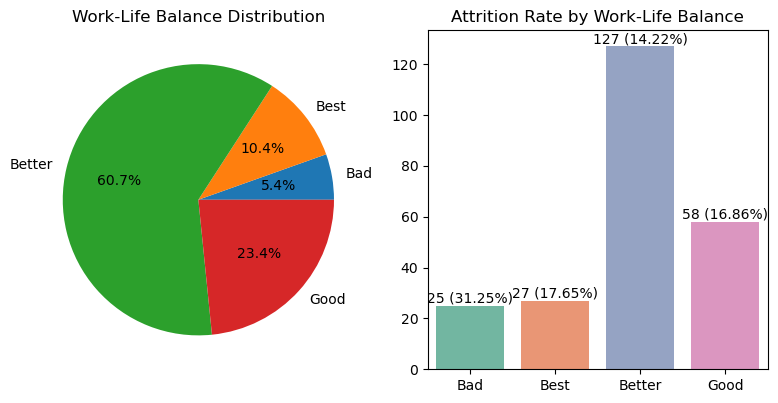

In [12]:

plt.figure(figsize=(8, 4))

value_counts = df["WorkLifeBalance"].value_counts().sort_index()

# Create a pie chart to show the distribution of WorkLifeBalance

plt.subplot(1,2,1)
plt.pie(value_counts, labels=value_counts.index, autopct="%0.1f%%")
plt.title("Work-Life Balance Distribution")
#plt.show()

# Filter the DataFrame for Attrition == 'Yes'
new_df = df[df["Attrition"] == 'Yes']

# Calculate value counts for the filtered data
value_2 = new_df["WorkLifeBalance"].value_counts().sort_index()

# Calculate percentages based on the counts
percentage = round((value_2 / value_counts) * 100, 2)  # Round the percentages to two decimal places

# Create a bar plot
plt.subplot(1,2,2)
bar = sn.barplot(x=value_2.index, y=value_2.values, palette='Set2')

# Add labels to the bars showing counts and percentages
for index, value in enumerate(value_2):
    per=percentage[index]
    bar.text(index, value, f'{value} ({per}%)', ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.title("Attrition Rate by Work-Life Balance")
plt.show()

# ! Inference
60.7% of employees thinks they have better work life balance 
The highest attrition rate is by employees who ratied work life balance as  Bad and is only 5%

In [13]:
def plot_piebar(col):
    plt.figure(figsize=(14, 6))
    value_counts = df[col].value_counts().sort_index()

    # Create a pie chart to show the distribution of WorkLifeBalance

    plt.subplot(1,2,1)
    plt.pie(value_counts, labels=value_counts.index, autopct="%0.1f%%")
    plt.title(f"{col} Distribution")
    #plt.show()

    # Filter the DataFrame for Attrition == 'Yes'
    new_df = df[df["Attrition"] == 'Yes']

    # Calculate value counts for the filtered data
    value_2 = new_df[col].value_counts().sort_index()

    # Calculate percentages based on the counts
    percentage = round((value_2 / value_counts) * 100, 2)  # Round the percentages to two decimal places

    # Create a bar plot
    plt.subplot(1,2,2)
    bar = sn.barplot(x=value_2.index, y=value_2.values, palette='Set2')

    # Add labels to the bars showing counts and percentages
    for index, value in enumerate(value_2):
        per=percentage[index]
        bar.text(index, value, f'{value} ({per}%)', ha="center", va="bottom", fontsize=10)


    plt.title(f"Attrition Rate by {col}")
    plt.show()

In [14]:
vals=[col for col in df.columns if df[col].dtype=="object"]
vals.remove("Attrition")    

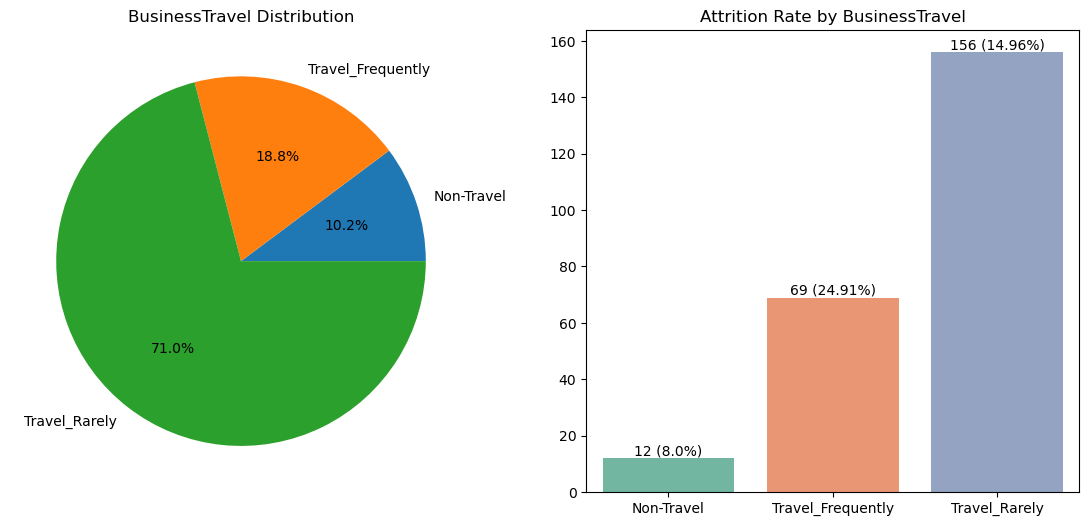

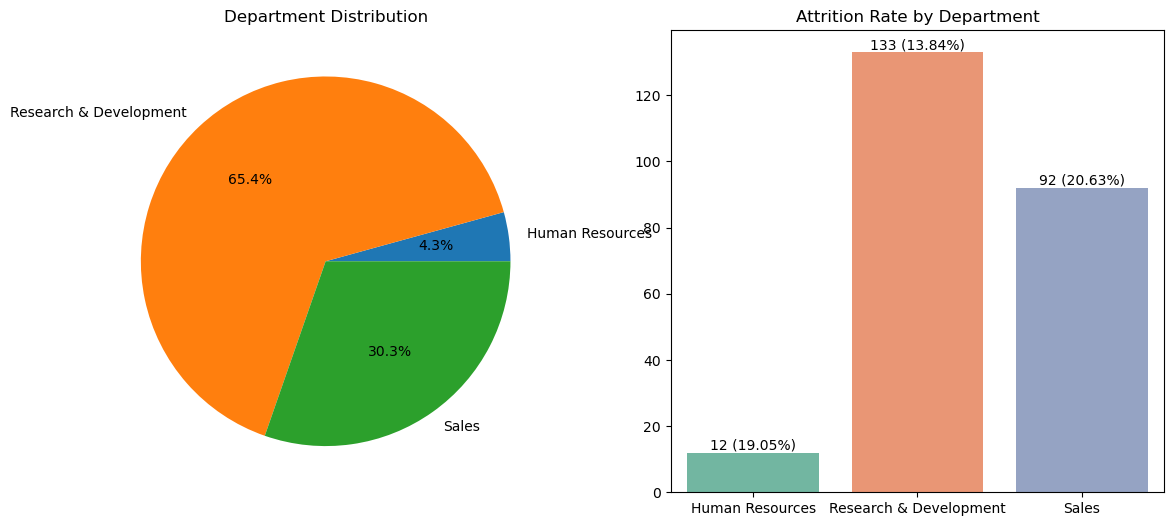

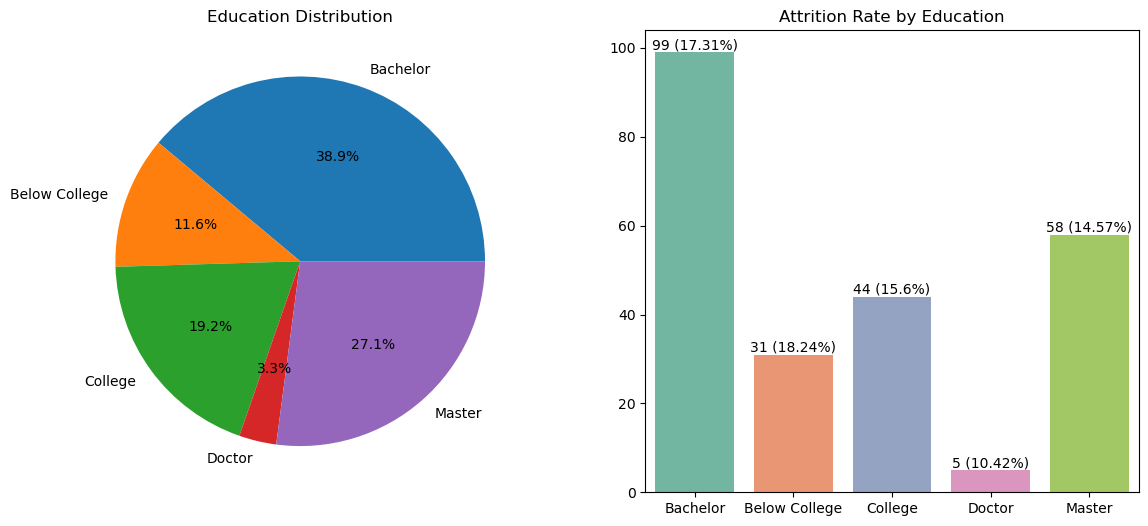

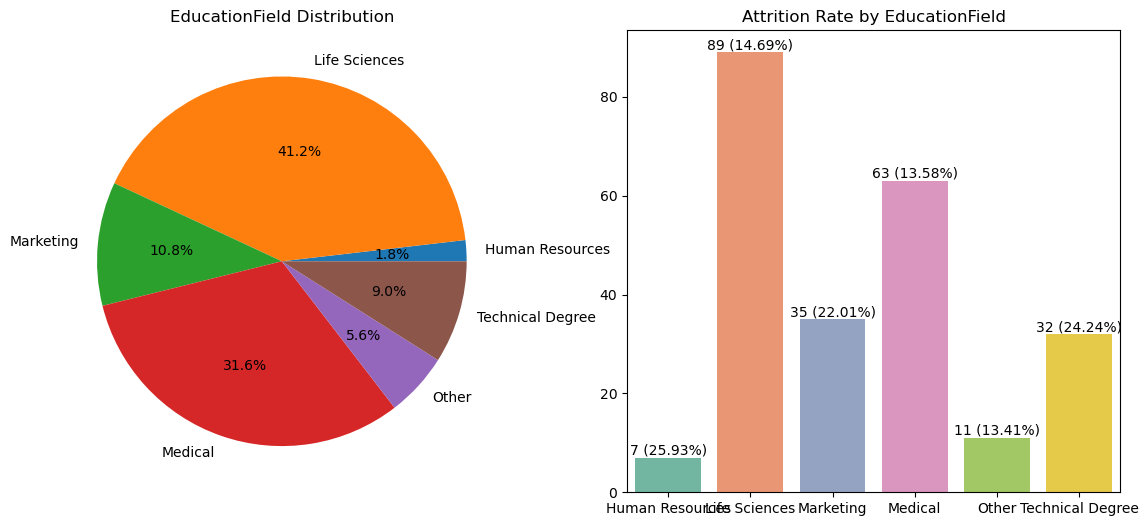

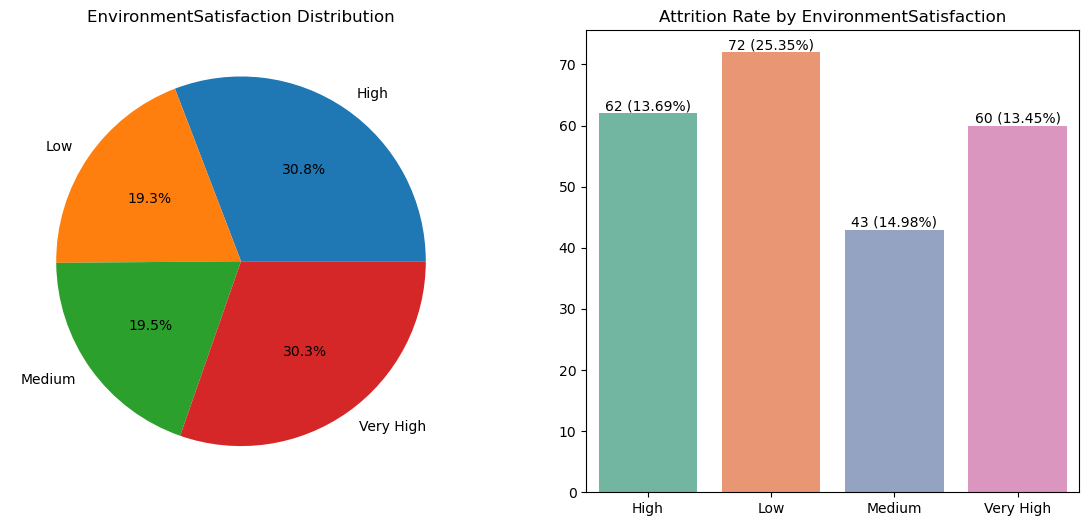

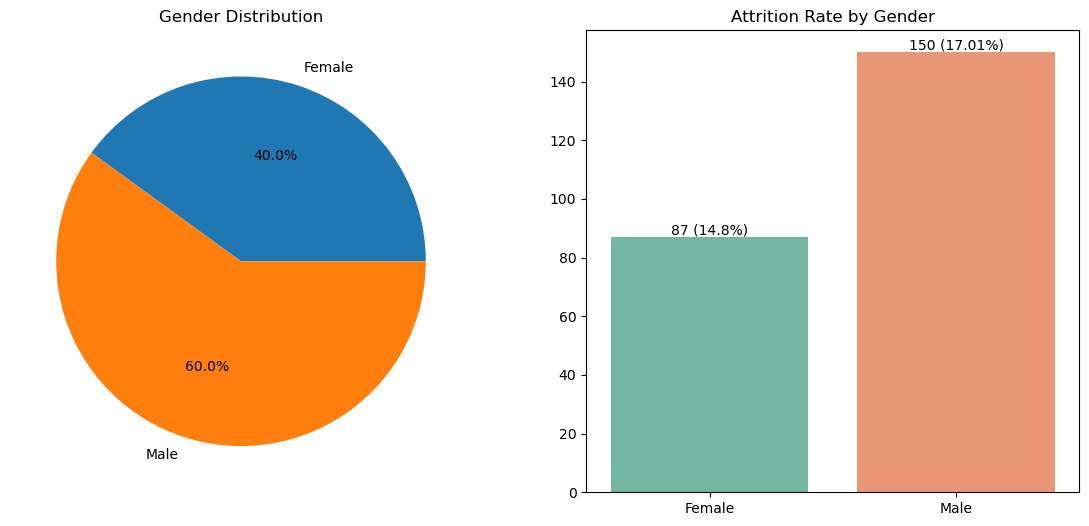

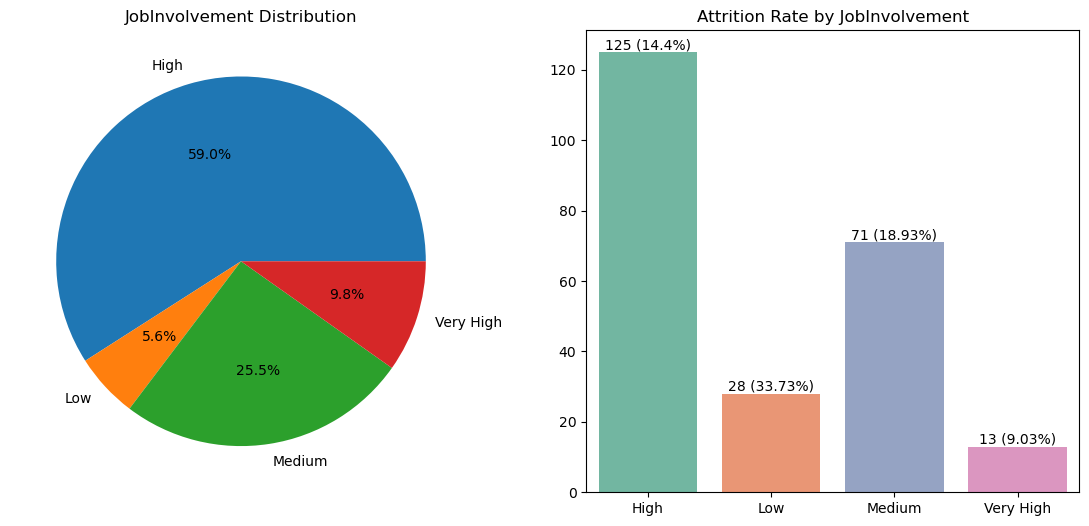

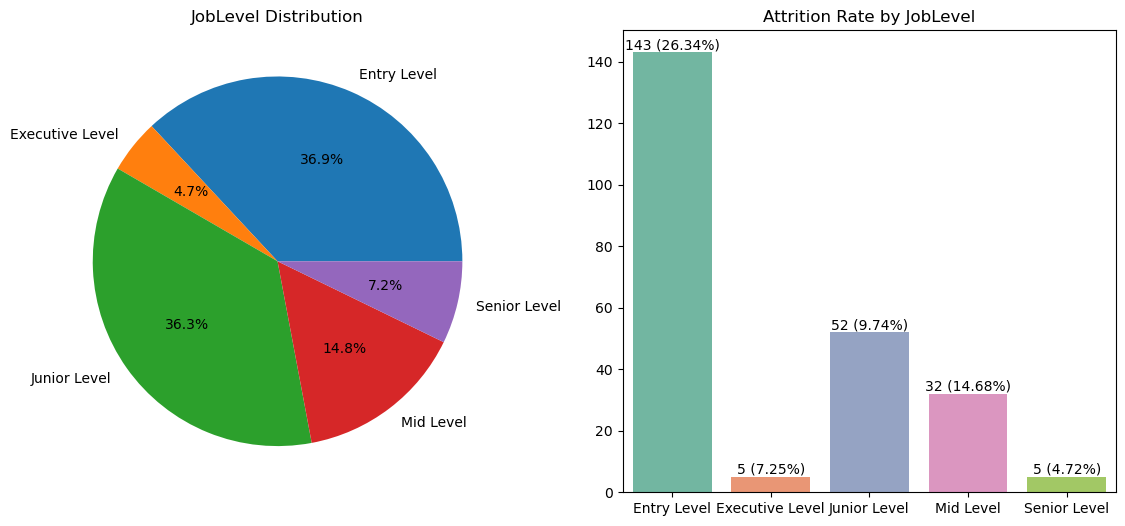

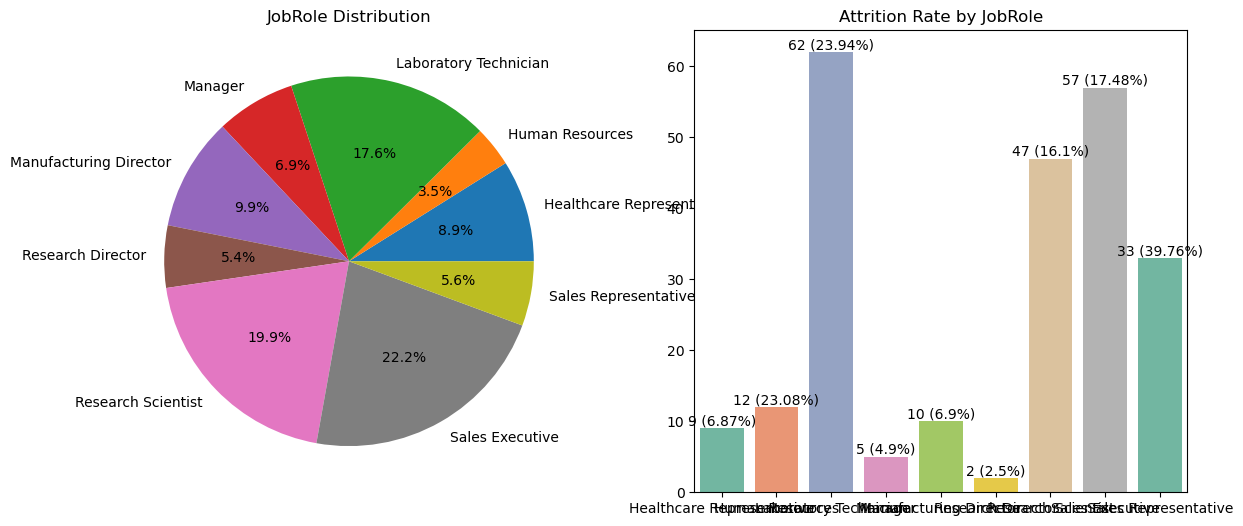

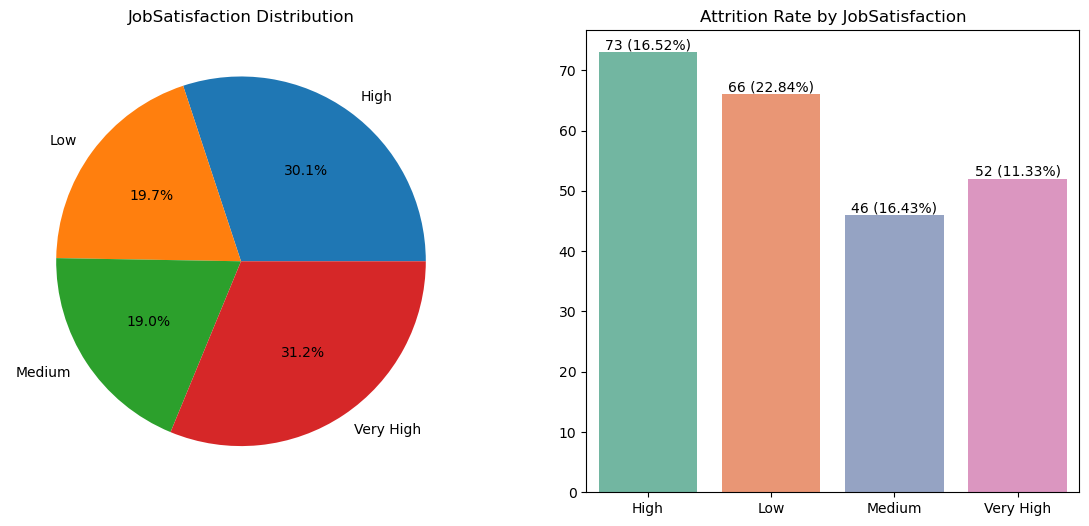

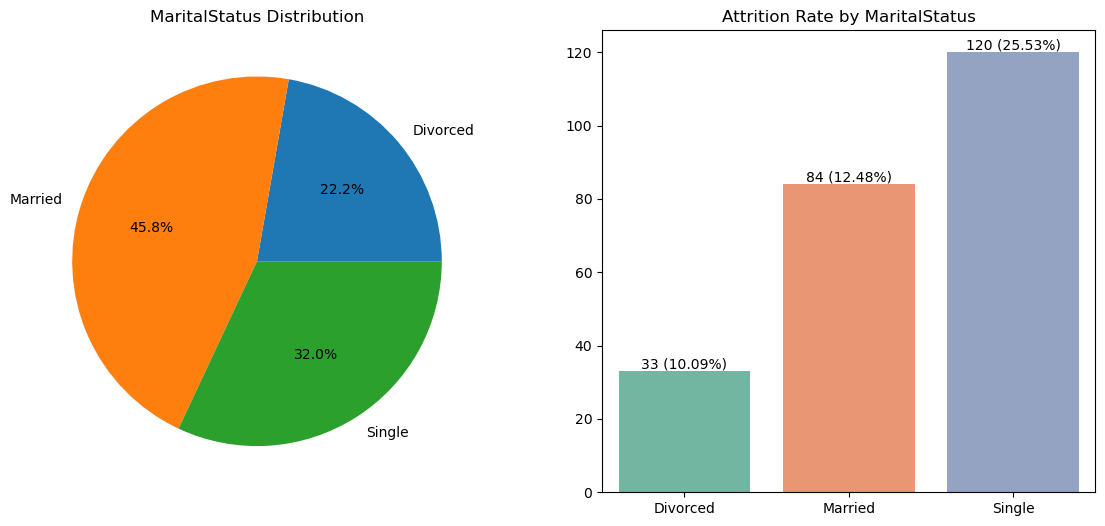

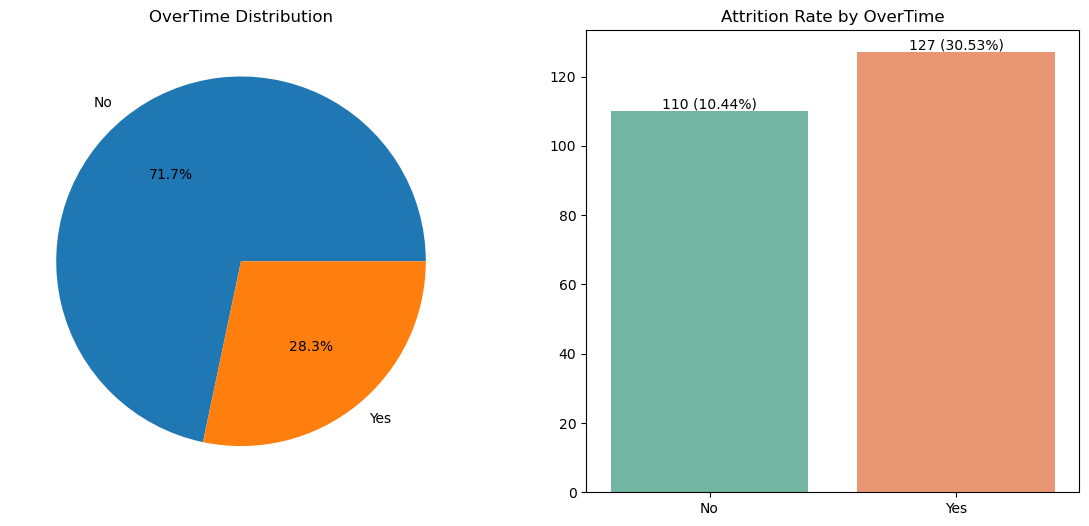

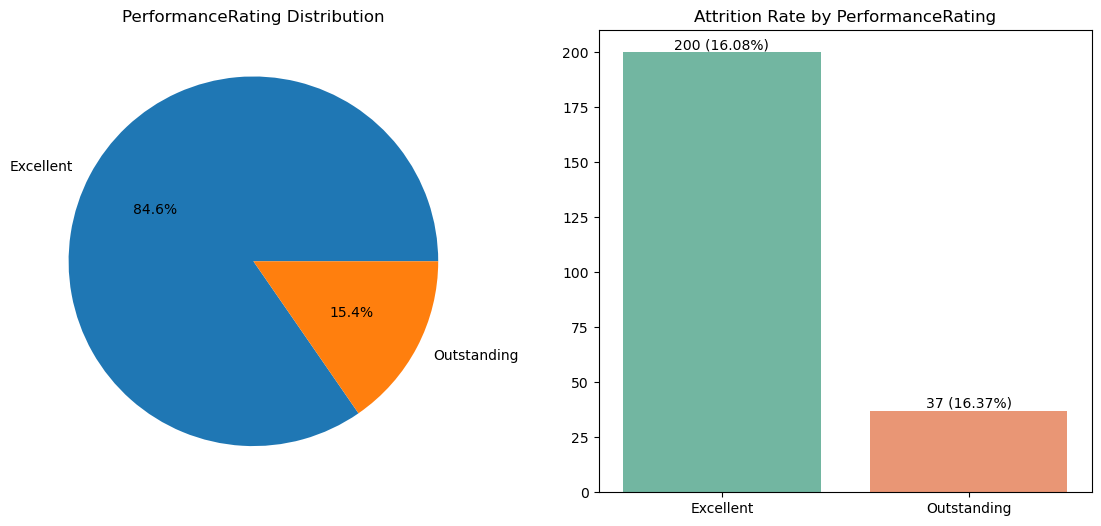

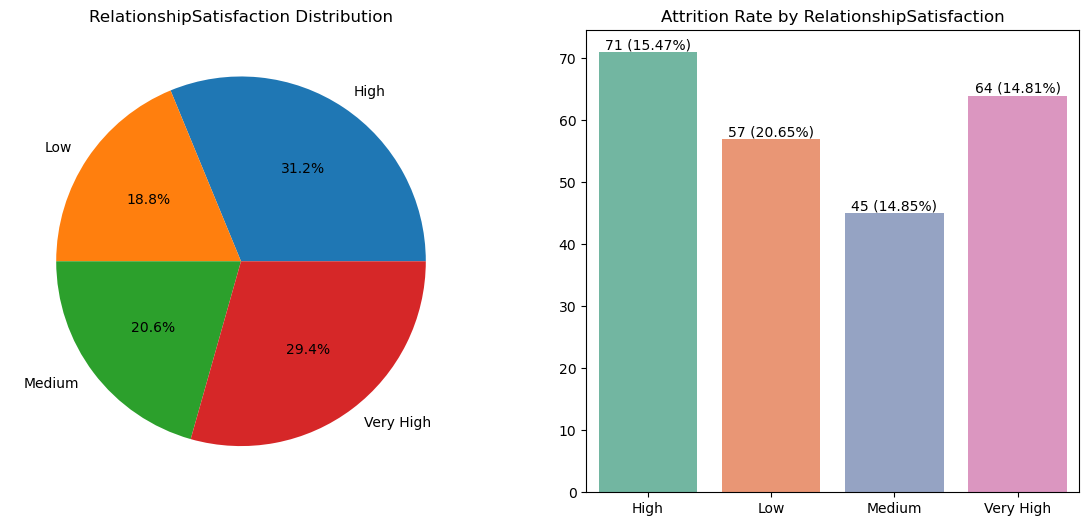

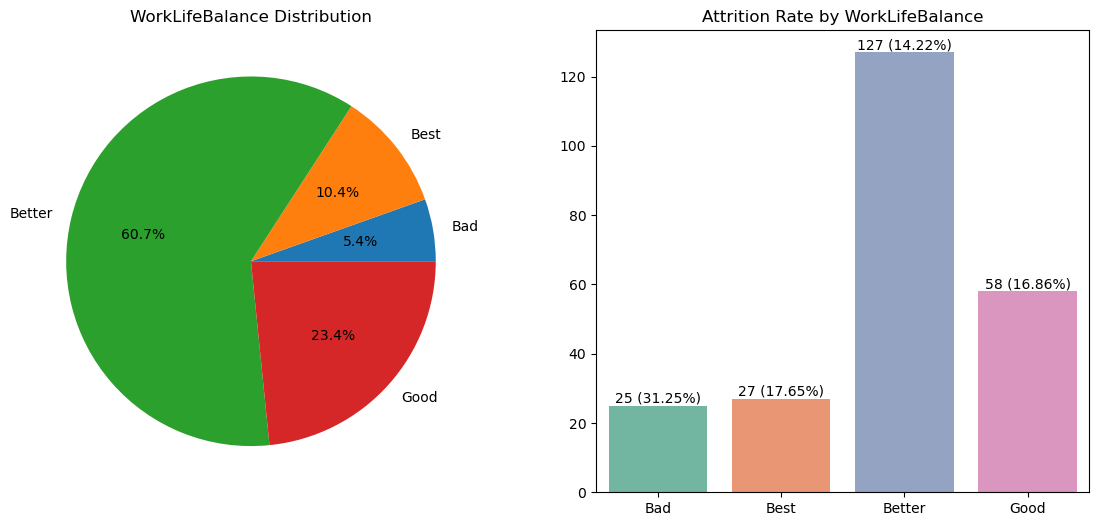

In [15]:
for i in vals:
    plot_piebar(i)

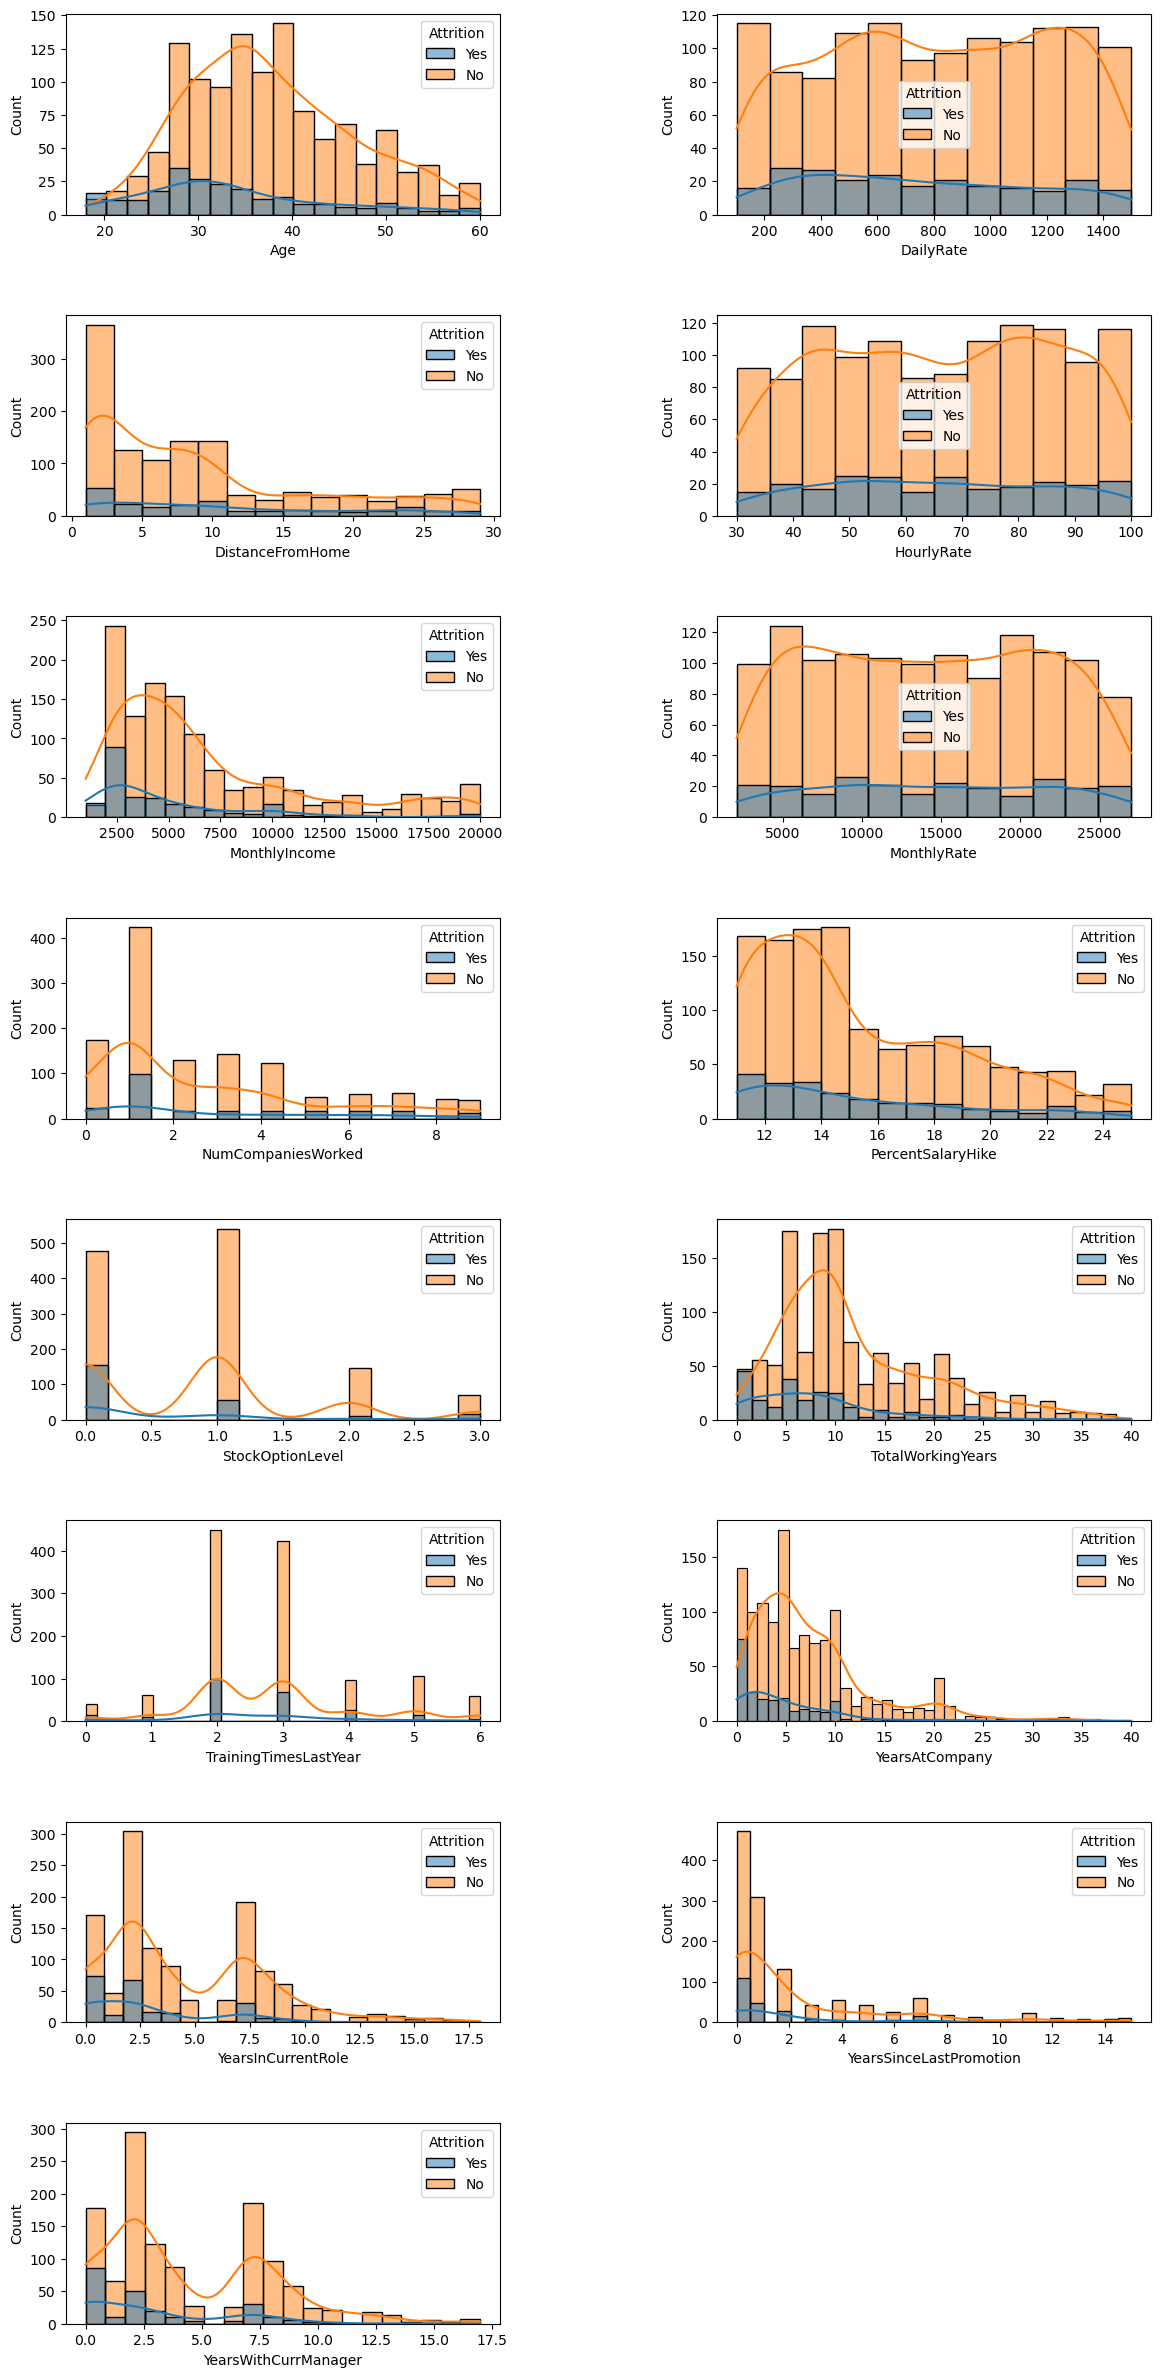

In [16]:
numerical_cols = [col for col in df.columns if df[col].dtype=="int64"]
plt.figure(figsize=(14,30))
for i,values in enumerate(numerical_cols):
    plt.subplot(8,2,i+1)
    sn.histplot(data=df,x=values,hue="Attrition",kde=True)
plt.subplots_adjust(wspace=0.5,hspace=0.5)
plt.show()

In [17]:
len(numerical_cols)

15

In [18]:
def hist_box(col):    
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    sn.histplot(data=df,x=col,hue="Attrition",kde=True)
    plt.title(f"Distribution by {col} & atttrition Histograms", fontweight="black", size=14, pad=10)
    plt.tight_layout()
    
    plt.subplot(1,2,2)
    sn.boxplot(data=df,x="Attrition",y=col,hue="Attrition")
    plt.title(f"Distribution by {col} & atttrition boxplots", fontweight="black", size=14, pad=10)
    plt.tight_layout()
    plt.show()

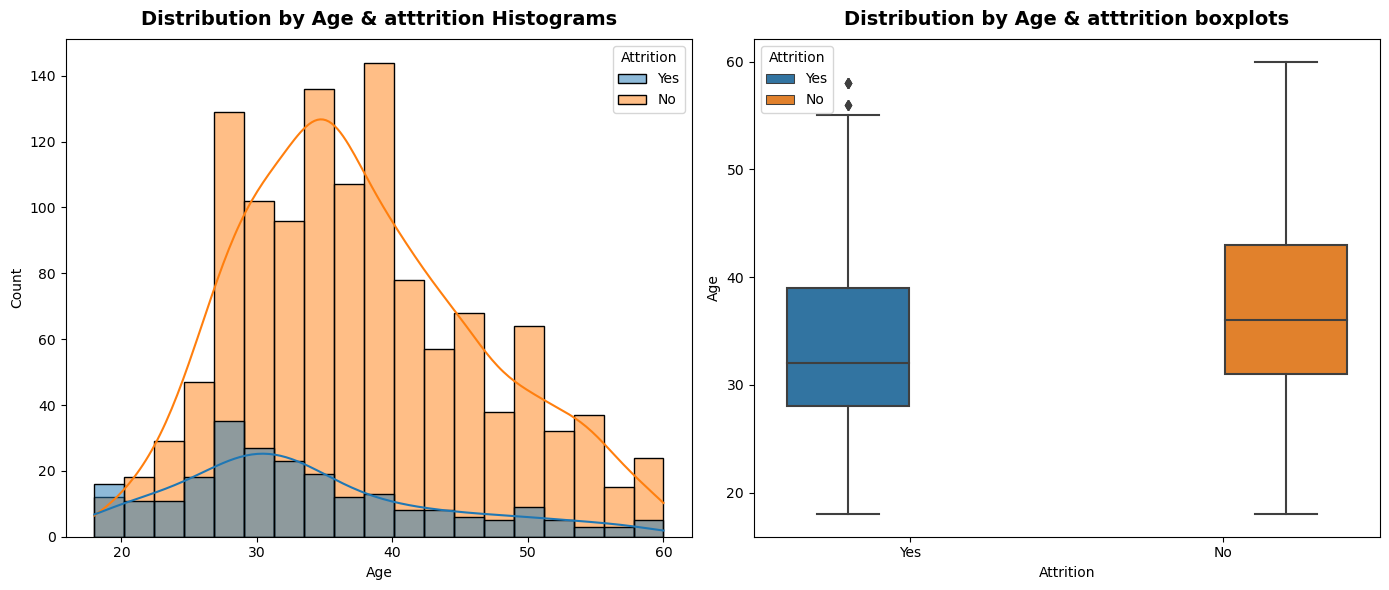

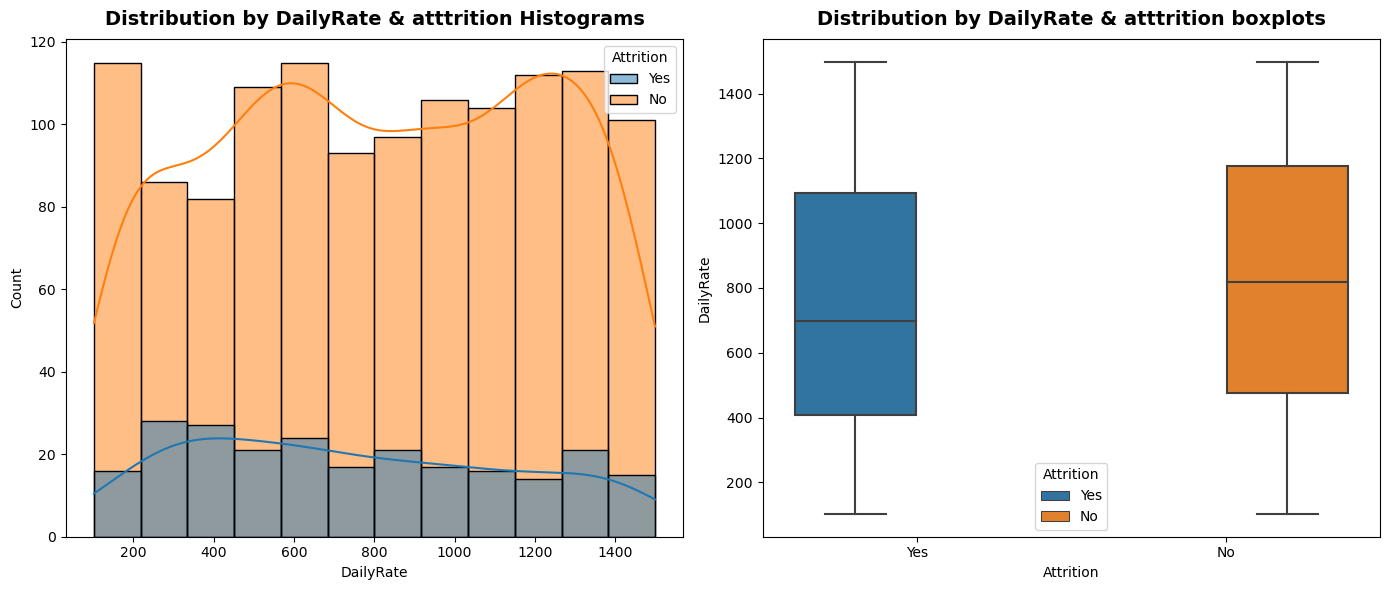

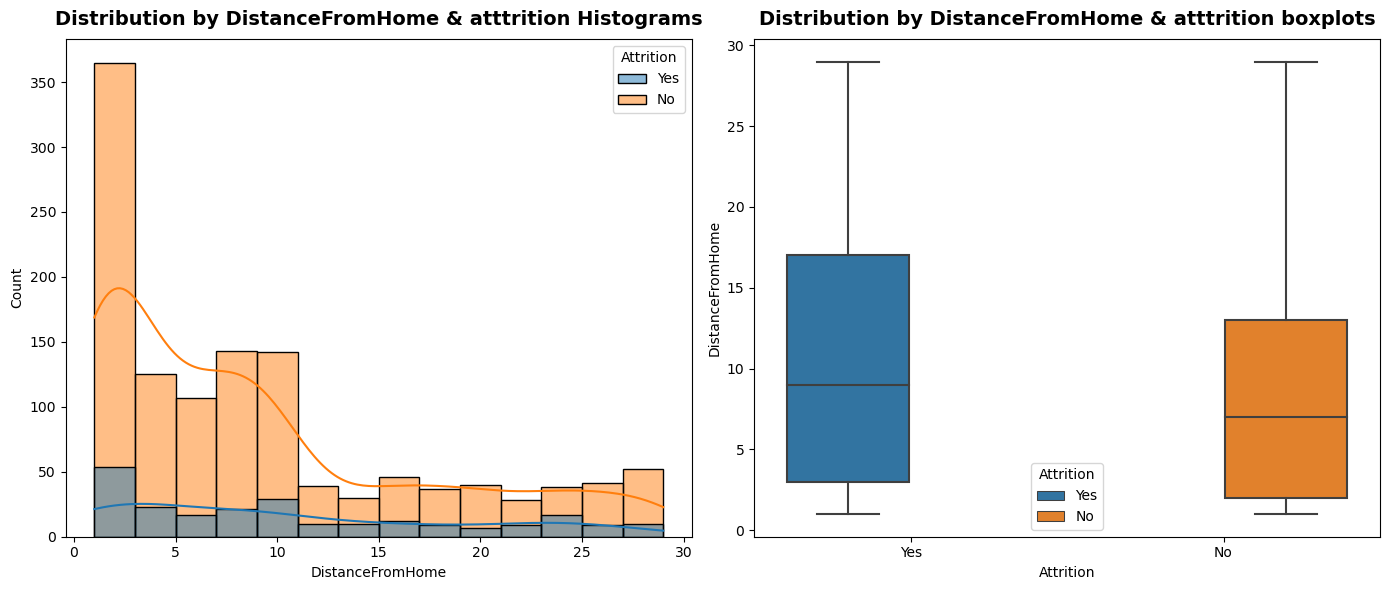

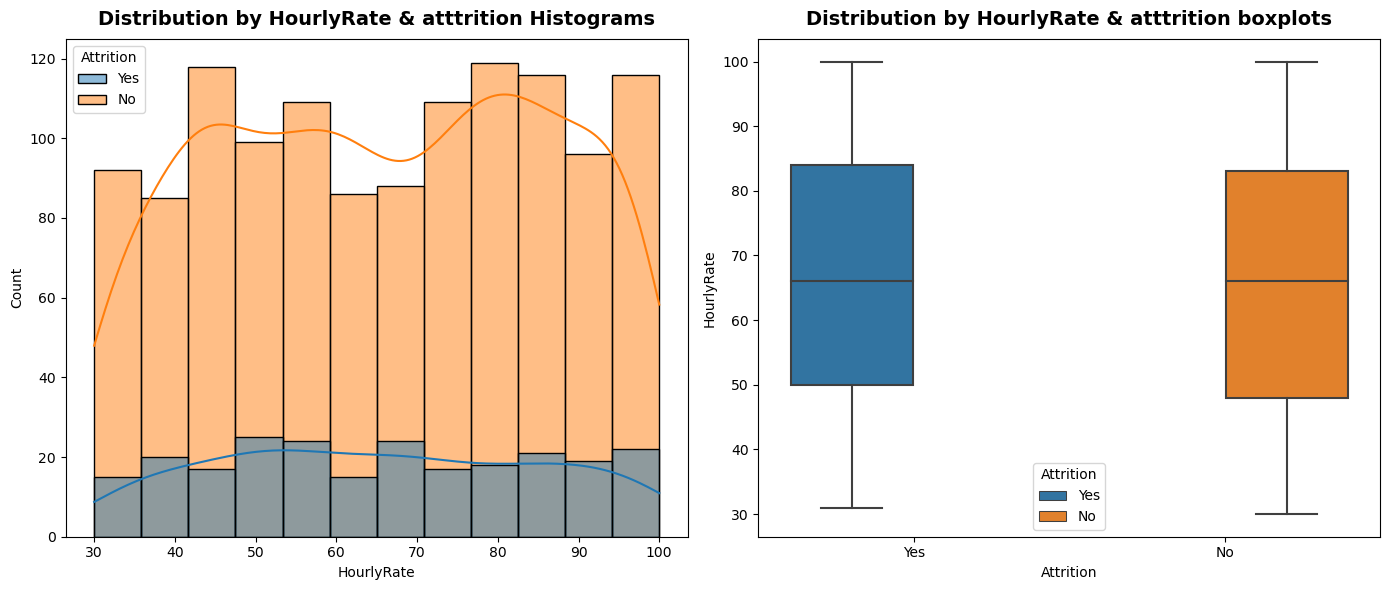

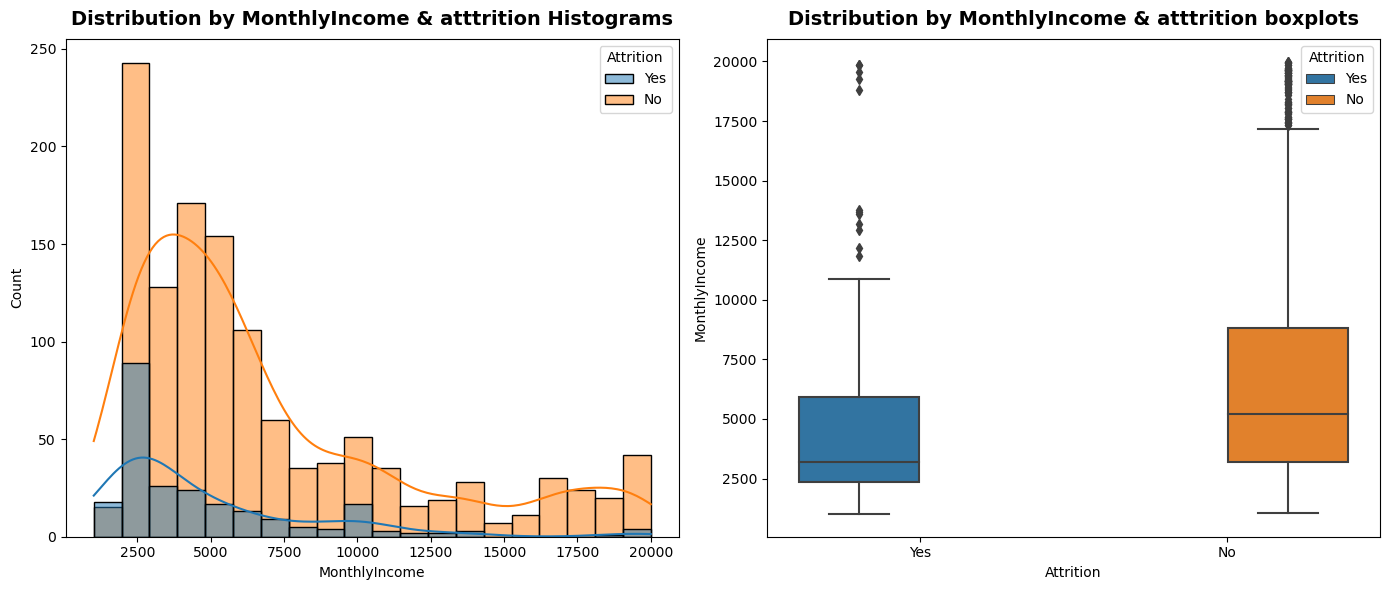

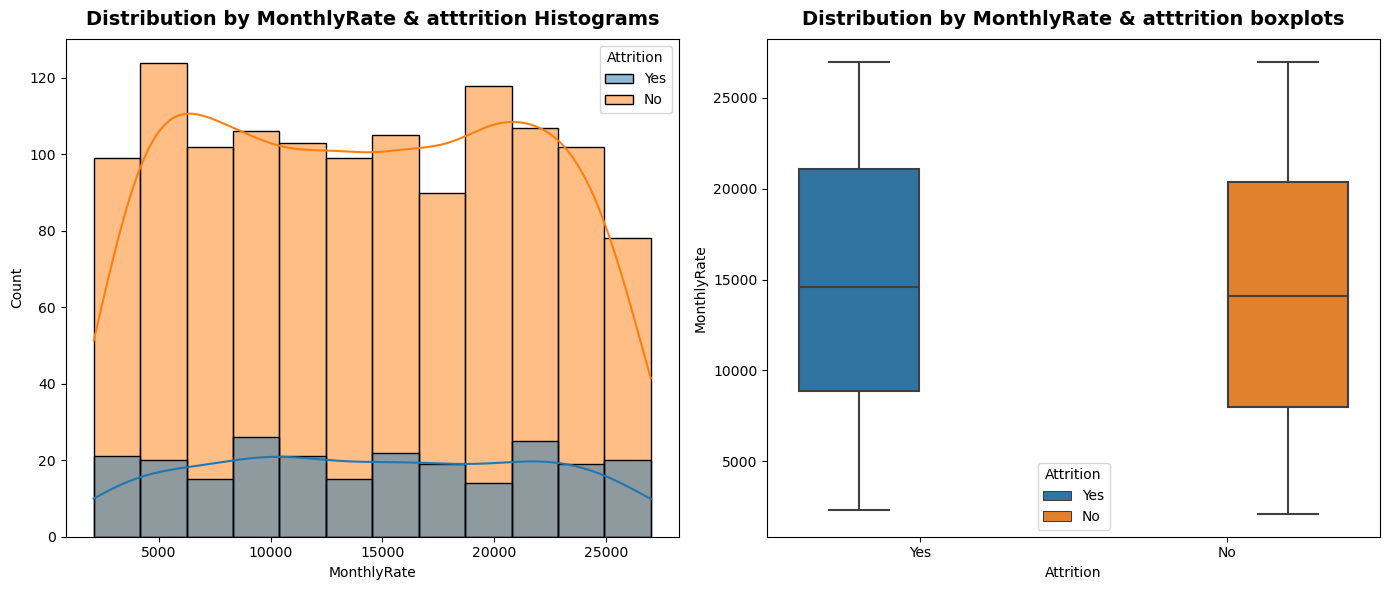

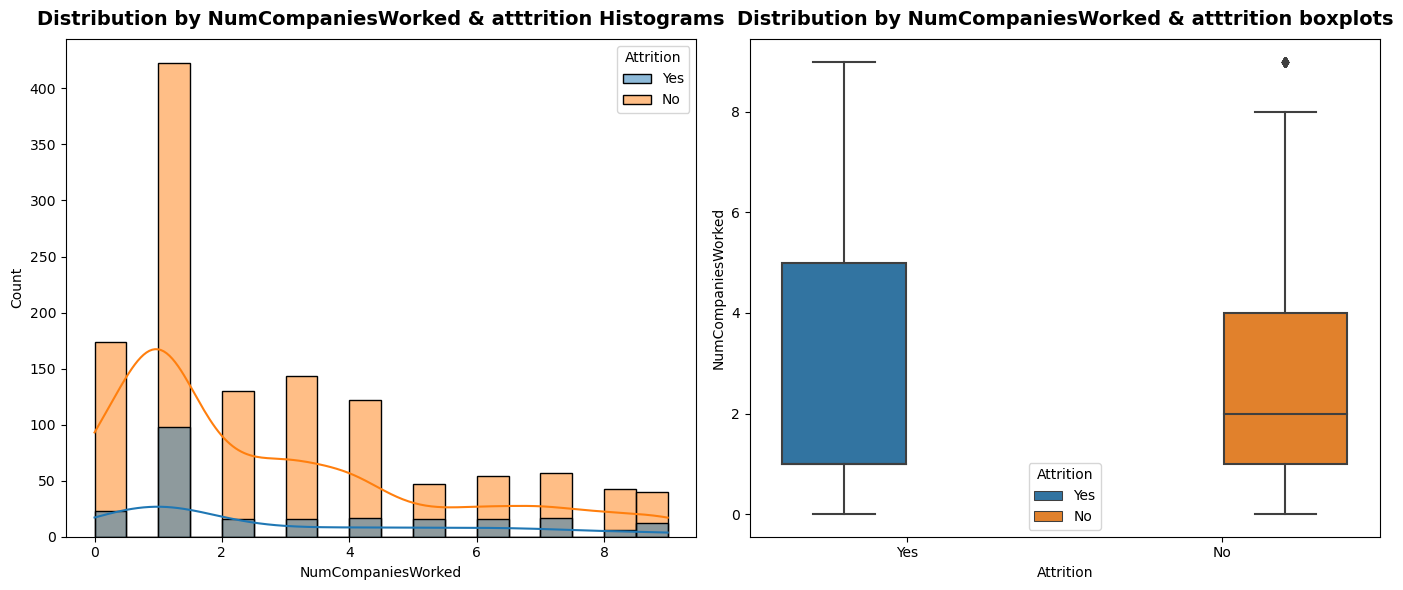

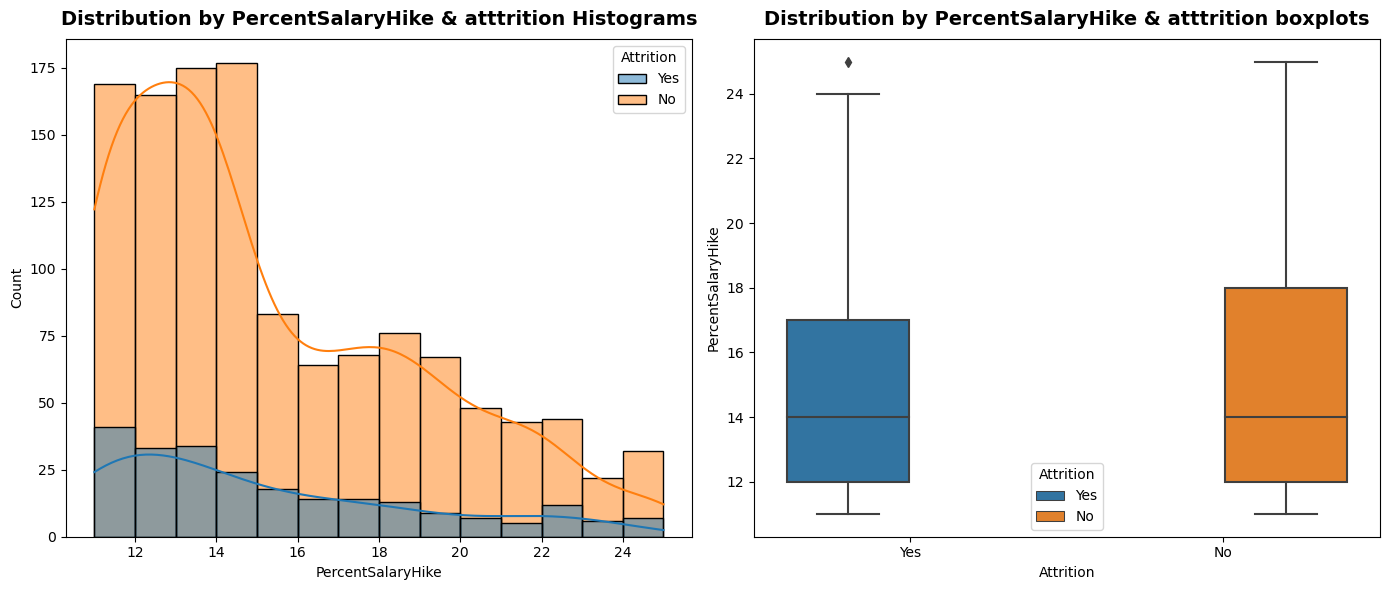

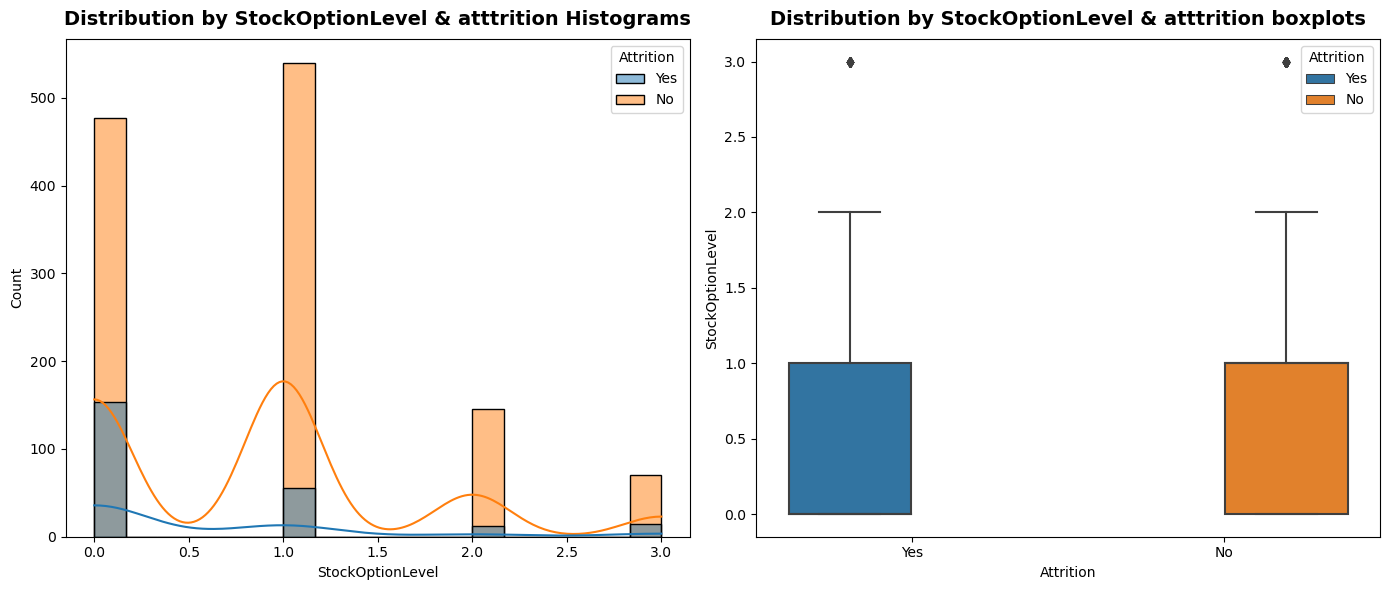

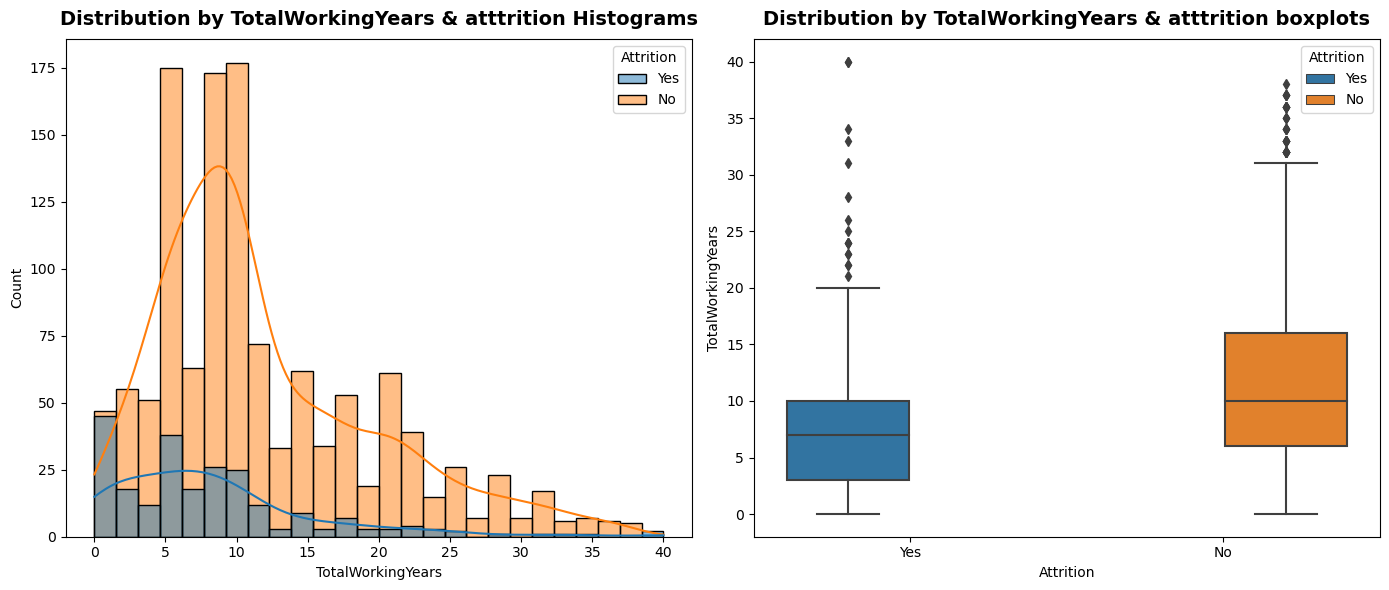

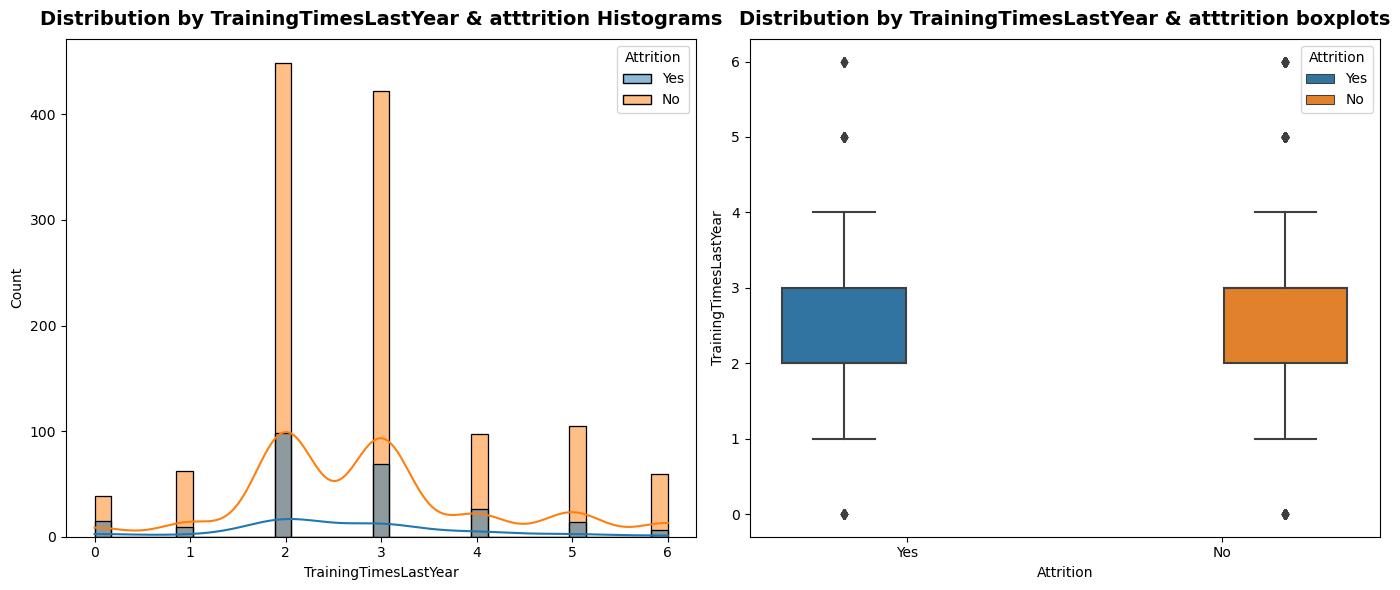

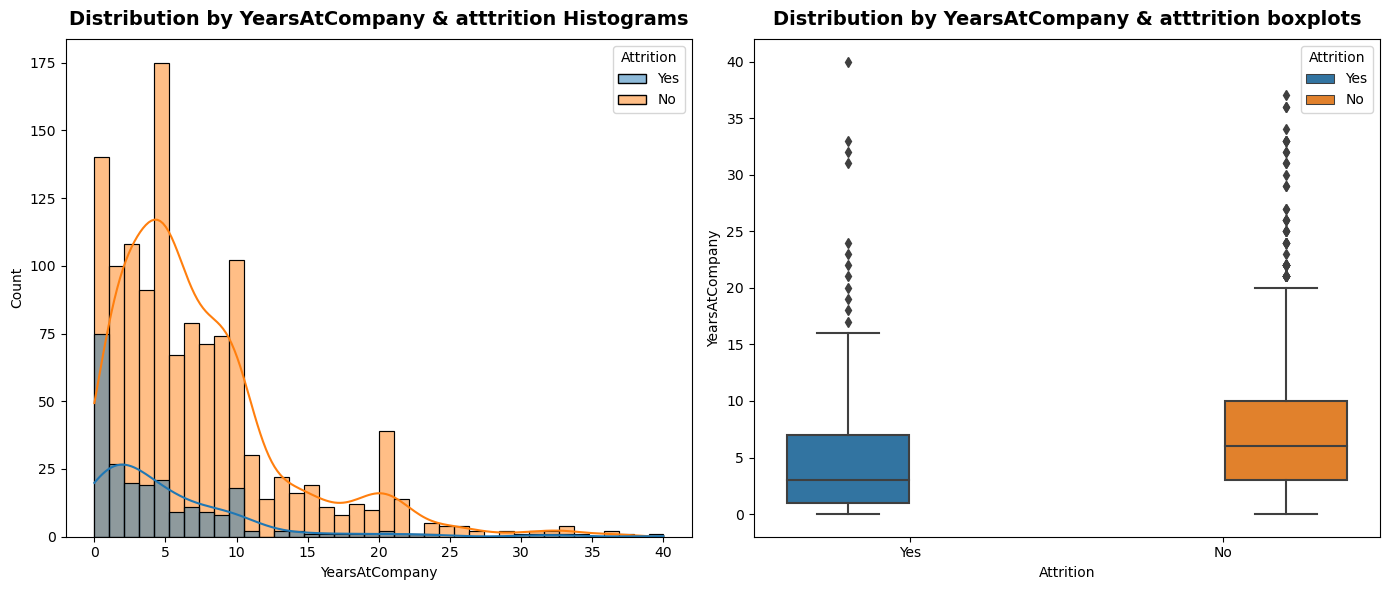

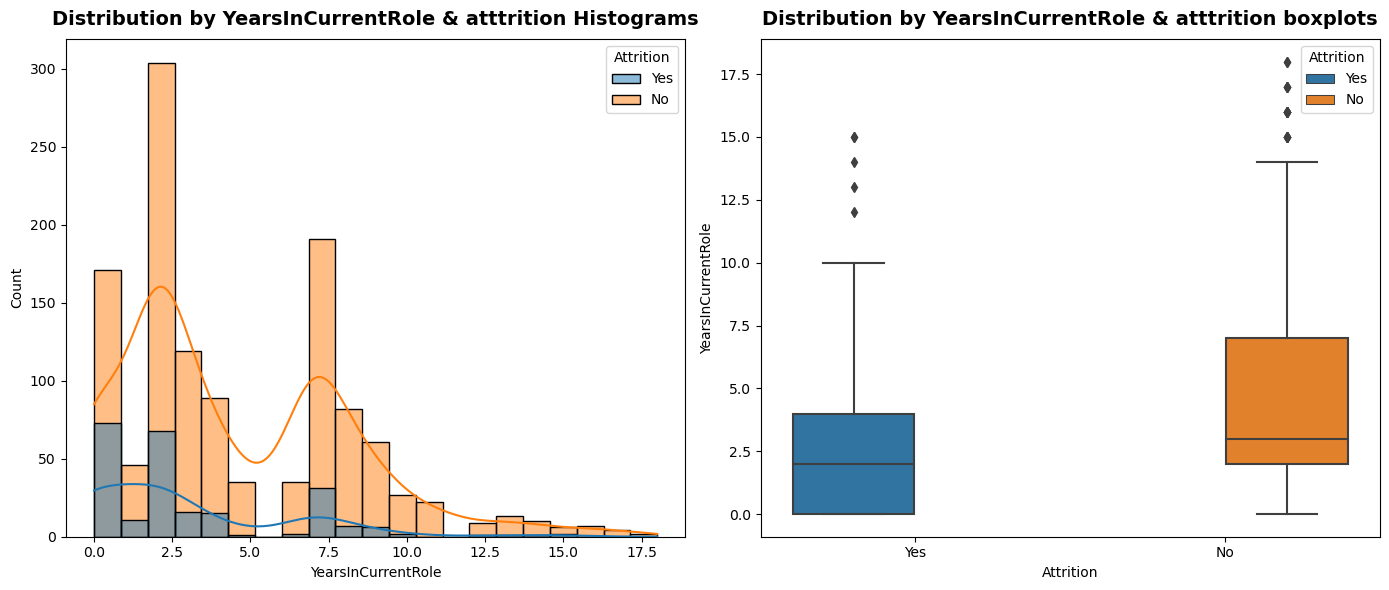

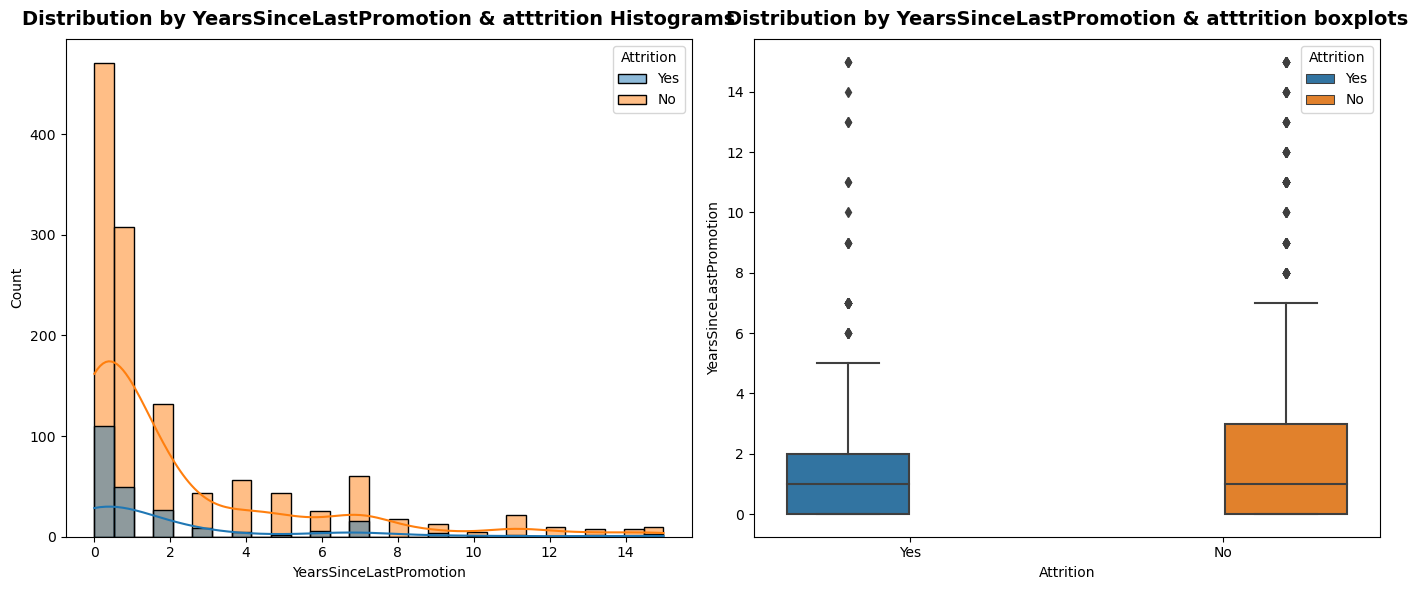

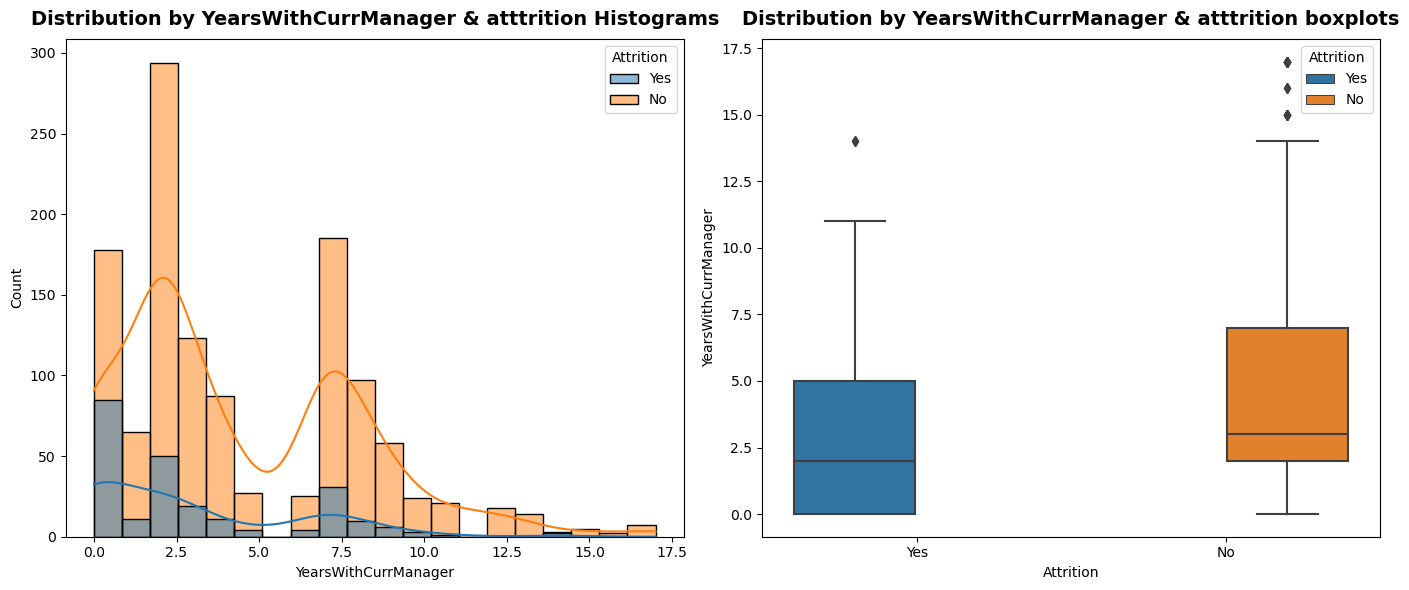

In [19]:
for i in numerical_cols:    
    hist_box(i)

In [20]:
#Replacing the categories with their orginal encoded numbers

data["EnvironmentSatisfaction"] = data["EnvironmentSatisfaction"].replace({"Low":0 ,"Medium":1, "High":2, "Very High":3})
data["JobInvolvement"] = data["JobInvolvement"].replace({"Low":0,"Medium":1,"High":2,"Very High":3})
data["JobSatisfaction"] = data["JobSatisfaction"].replace({"Low":0,"Medium":1,"High":2,"Very High":3})
data["PerformanceRating"] = data["PerformanceRating"].replace({"Low":0,"Good":1,"Excellent":2,"Outstanding":3})
data["RelationshipSatisfaction"] = data["RelationshipSatisfaction"].replace({"Low":0,"Medium":1,"High":2,"Very High":3})
data["WorkLifeBalance"] = data["WorkLifeBalance"].replace({"Bad":0,"Good":1,"Better":2,"Best":3})
data["Education"] = data["Education"].replace({"Below College":0,"College":1,"Bachelor":2,"Master":3,"Doctor":4})
data["JobLevel"] = data["JobLevel"].replace({"Entry Level":0,"Junior Level":1,"Mid Level":2,
                                           "Senior Level":3,"Executive Level":4})
data["Gender"] = data["Gender"].replace({"Female":0 ,"Male":1})
data["Attrition"] = data["Attrition"].replace({"No":0 ,"Yes":1})

In [21]:
lists =[col for col in df.columns if df[col].dtype=="object"]

In [22]:
for i in lists:
    print(df[i].nunique())
    print(i)
lists.remove("JobRole")

3
BusinessTravel
3
Department
6
EducationField
9
JobRole
3
MaritalStatus
2
OverTime


In [23]:
#Label Encoding Features with less number of ELements 

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in lists:
    df[i]=le.fit_transform(df[i])

In [24]:
#One Hot Encoding JobRole

from sklearn.preprocessing import OneHotEncoder
hot=OneHotEncoder(handle_unknown="ignore",sparse=False,dtype="int",drop="first")
one_hot_Encoded_columns=pd.DataFrame(hot.fit_transform(df[['JobRole']]),columns=hot.get_feature_names_out(["JobRole"]))


E:\SOFTWARES\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [25]:
final_df=pd.concat([df,one_hot_Encoded_columns],axis=1)
final_df.drop("JobRole",axis=1,inplace=True)

In [26]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Age                             1470 non-null   int64
 1   Attrition                       1470 non-null   int64
 2   BusinessTravel                  1470 non-null   int32
 3   DailyRate                       1470 non-null   int64
 4   Department                      1470 non-null   int32
 5   DistanceFromHome                1470 non-null   int64
 6   Education                       1470 non-null   int64
 7   EducationField                  1470 non-null   int32
 8   EnvironmentSatisfaction         1470 non-null   int64
 9   Gender                          1470 non-null   int64
 10  HourlyRate                      1470 non-null   int64
 11  JobInvolvement                  1470 non-null   int64
 12  JobLevel                        1470 non-null   int64
 13  Job

<Axes: >

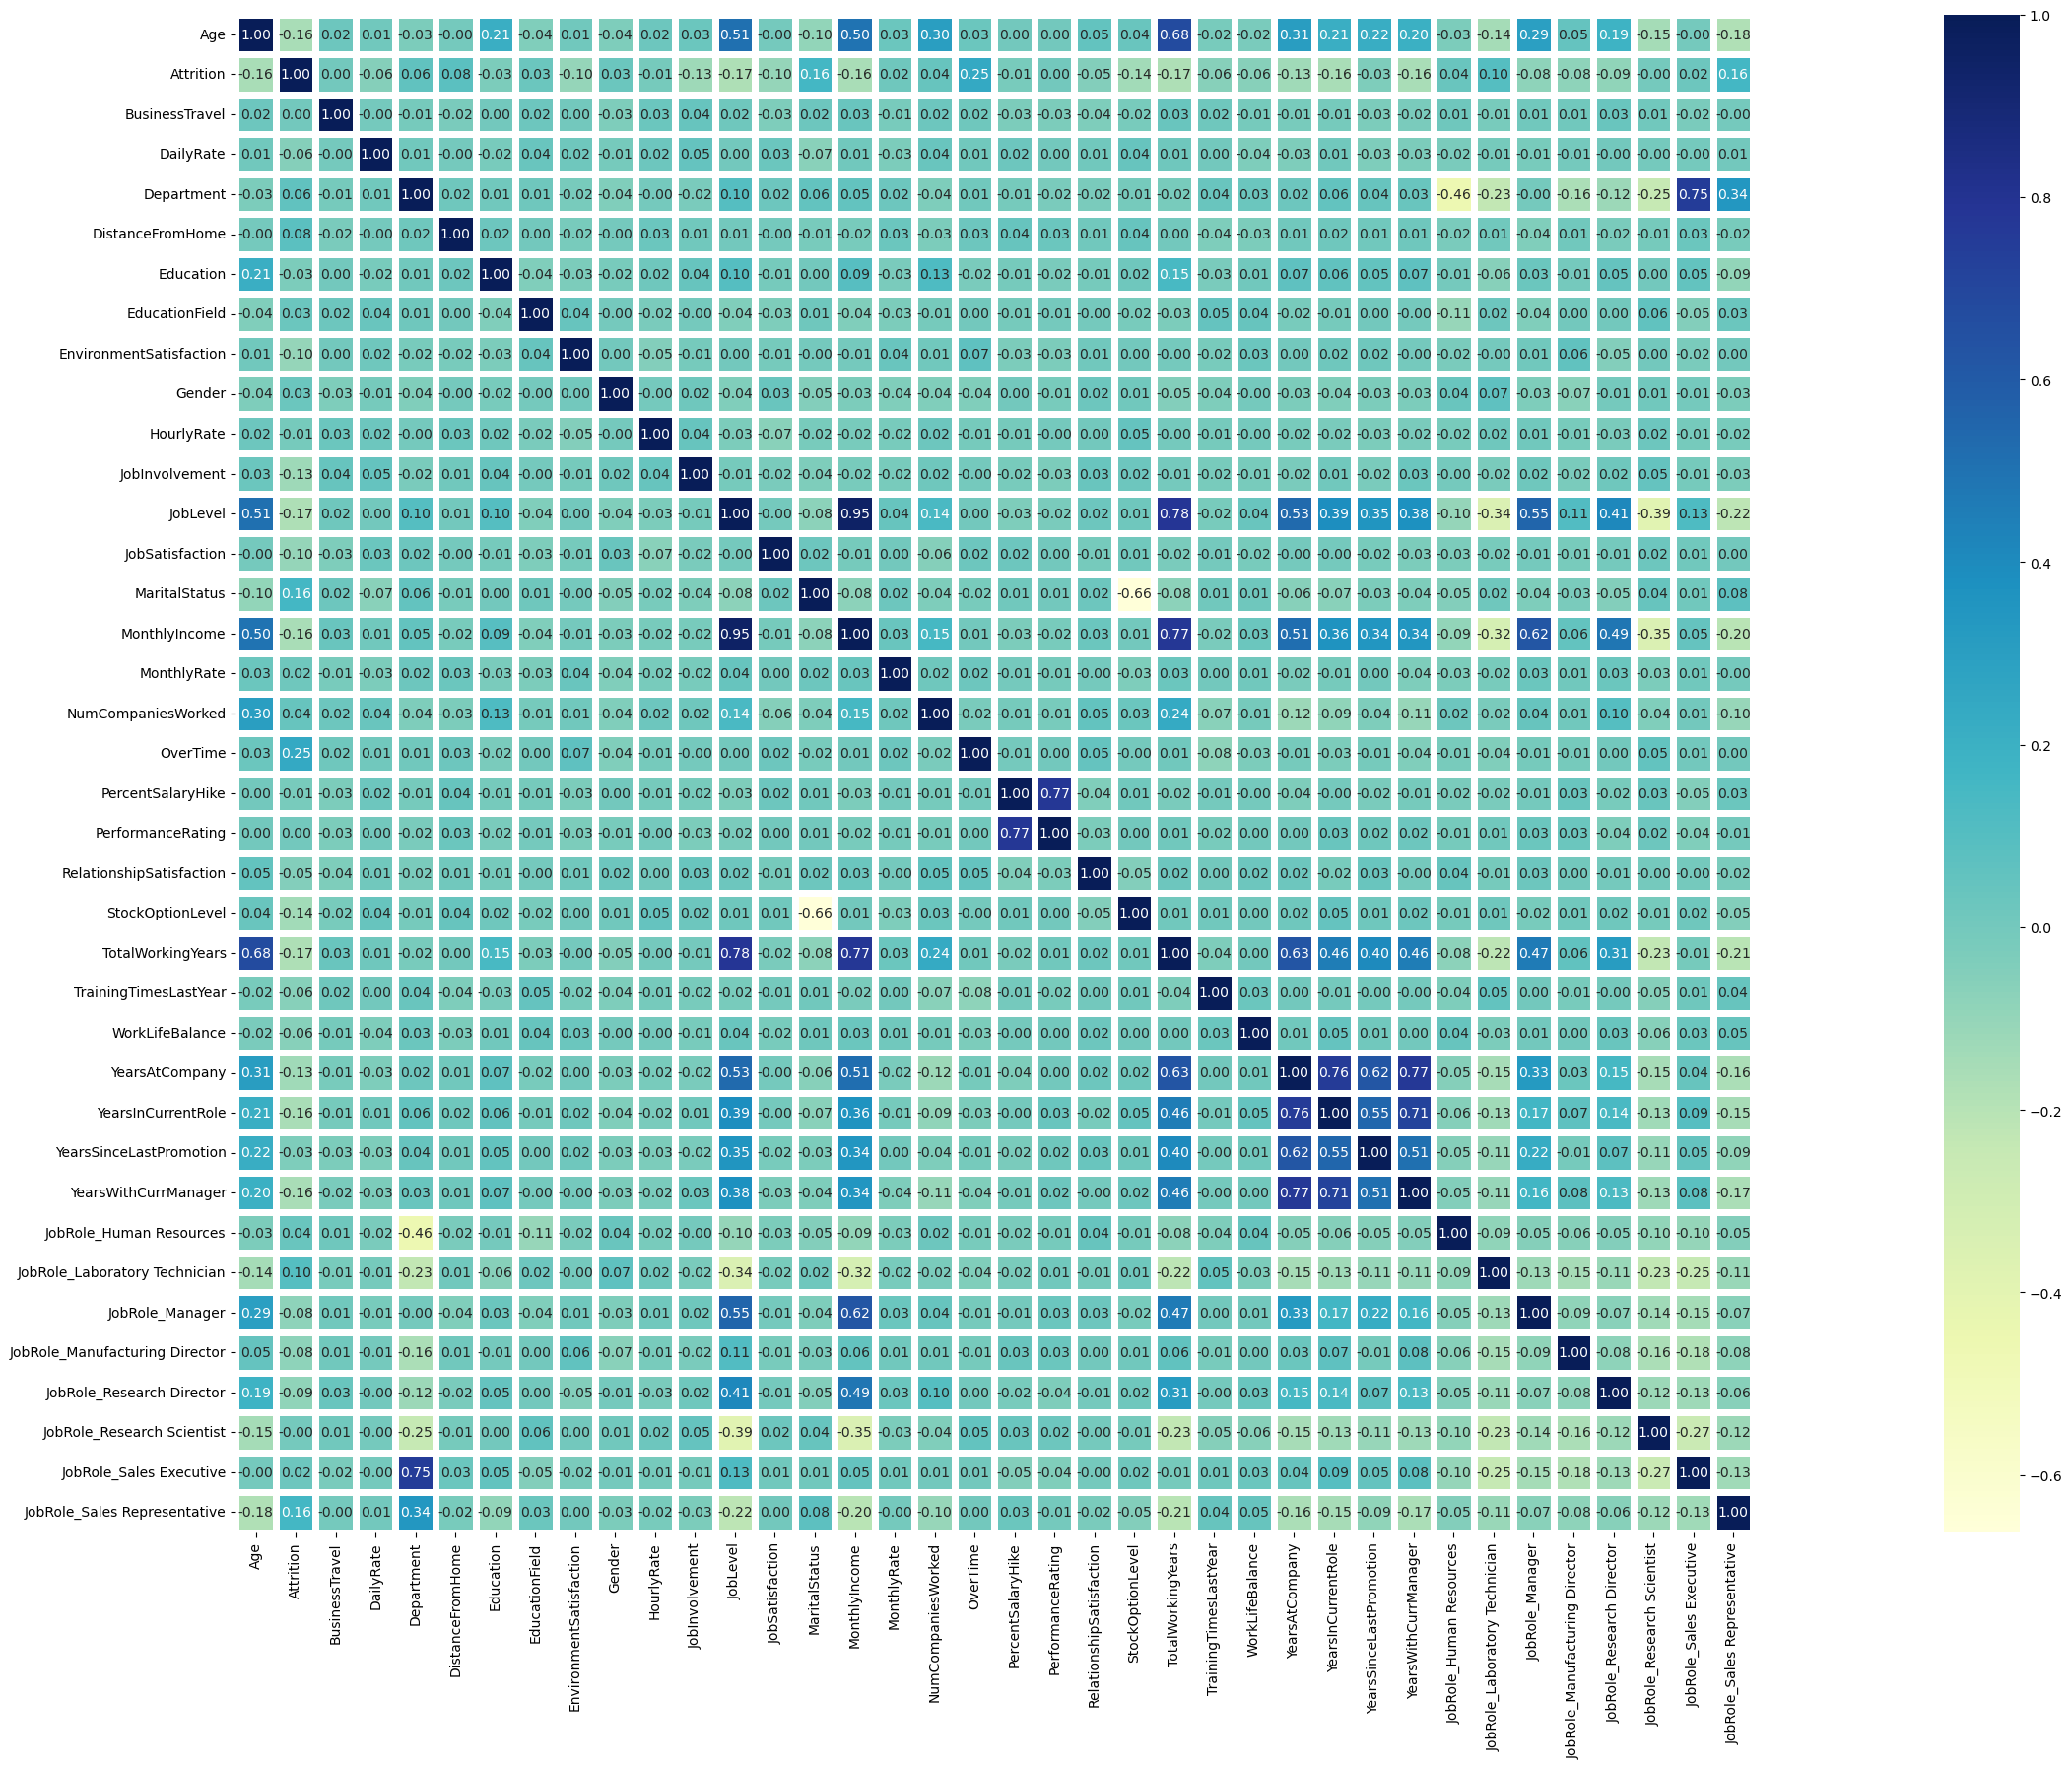

In [27]:
df_corr =final_df.corr()
plt.figure(figsize=(50,20))
sn.heatmap(df_corr,linewidths=5, annot=True, square=True,fmt='.2f',annot_kws={'size': 10},cmap='YlGnBu')

In [28]:
#Finding Multi Colinear Features

high_correlation_mask = df_corr >= 0.75
highly_correlated_features = []

for feature in high_correlation_mask.columns:
    #finding features with a high correlation
    correlated_with = high_correlation_mask.index[high_correlation_mask[feature]].tolist()
    #Finding each of these correlated features and listing them
    for correlated_feature in correlated_with:
        
        if feature!=correlated_feature and (correlated_feature,feature) not in highly_correlated_features:
            highly_correlated_features.append((feature, correlated_feature))
            
for feature1, feature2 in highly_correlated_features:
    print(f"{feature1} and {feature2}")

JobLevel and MonthlyIncome
JobLevel and TotalWorkingYears
MonthlyIncome and TotalWorkingYears
PercentSalaryHike and PerformanceRating
YearsAtCompany and YearsInCurrentRole
YearsAtCompany and YearsWithCurrManager


In [29]:
cols = ["JobLevel", "TotalWorkingYears", "PercentSalaryHike", "YearsInCurrentRole", "YearsWithCurrManager"]
final_df.drop(columns=cols, inplace=True)
final_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative'],
      dtype='object')

In [30]:
#Selecting Dependant and Independant Features

y=final_df['Attrition']
X=final_df.drop(columns="Attrition",axis=1)


In [31]:
#Balancing Data by Over Sampling

import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X, y)
print(y.value_counts())
print()
print(y_smote.value_counts())

0    1233
1     237
Name: Attrition, dtype: int64

1    1233
0    1233
Name: Attrition, dtype: int64


In [32]:
#Importing neccesary Libraries

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve,roc_auc_score,precision_recall_curve,f1_score,auc,precision_score,recall_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

We have Prepared the data and dropped redunctant information from the data 

We have Over sampled the data to avoid model getting biased towards majority class

We are going to build models tune the models to produce the best outputs and check models performance accross different Metrics


# Model Building and Evaluation

##  Decision Tree

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x_smote,y_smote,test_size=0.33,random_state=33)

In [34]:
from sklearn.feature_selection import RFE

estimator = DecisionTreeClassifier()  # Define your estimator, e.g., DecisionTreeClassifier

# Initialize RFE with your estimator and the number of features to select (20 in this case)
rfe = RFE(estimator, n_features_to_select=20 )

rfe = rfe.fit(x_train, y_train.values.ravel())

print(rfe.support_)
print(rfe.ranking_)

[ True False  True False  True  True  True  True  True  True  True  True
  True  True  True False False False  True  True  True  True  True  True
 False False False False  True False False False]
[ 1  3  1  4  1  1  1  1  1  1  1  1  1  1  1  5 12  7  1  1  1  1  1  1
 10  9  8  2  1  6 13 11]


In [35]:
# Get the selected features
selected_features = rfe.support_
# Transform both training and test data using the selected features
x_train_selected = x_train.loc[:, selected_features]
x_test_selected = x_test.loc[:, selected_features]

## Note : 

Models Created have been removed and only the best and needed information is included 

`x_train_selected ` `x_test_selected` models build with these training and testing data are included in the removed models

`Random Forest` `Logistic Regression models` have not been elaborated as much as `Decision Trees`


In [36]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [37]:
print("Accuracy_Score   {} " .format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

Accuracy_Score   0.7788697788697788 
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       425
           1       0.74      0.82      0.78       389

    accuracy                           0.78       814
   macro avg       0.78      0.78      0.78       814
weighted avg       0.78      0.78      0.78       814



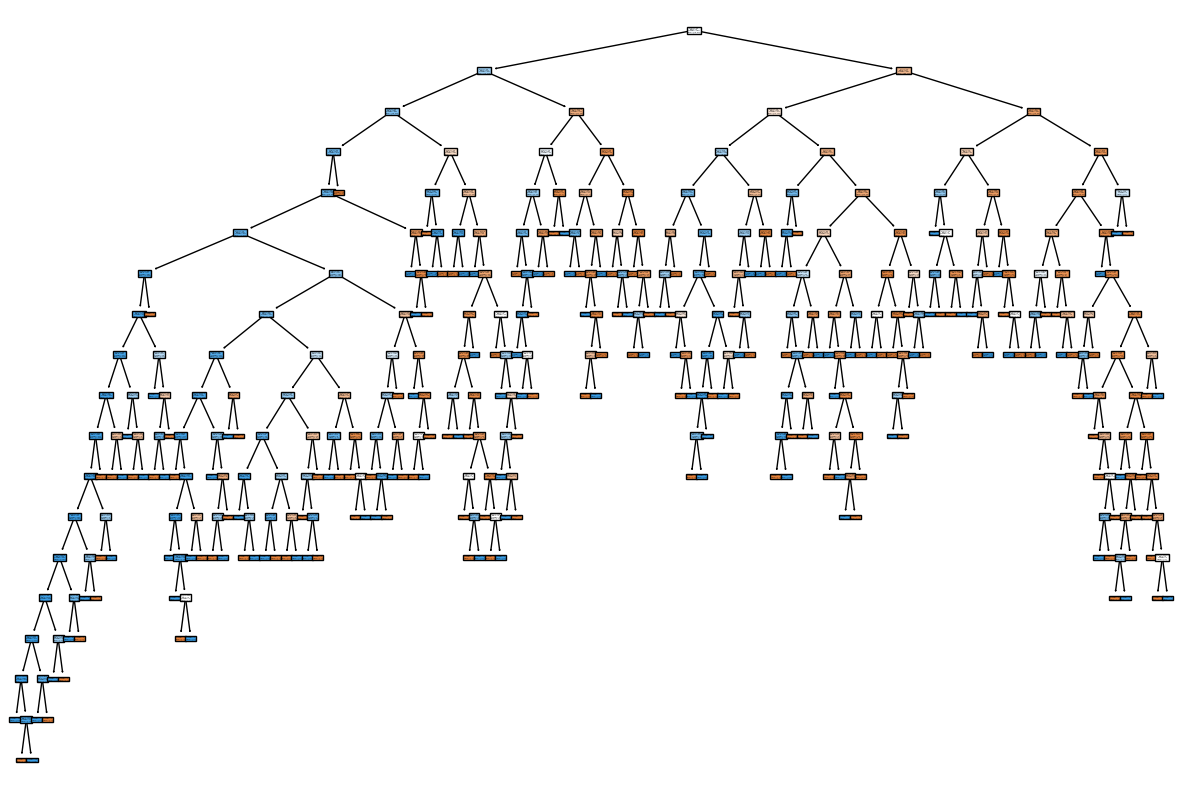

In [38]:
plt.figure(figsize=(15,10))
tree.plot_tree(dt_model,filled=True)
plt.show()

In [39]:
def roc_pr_curve(model,x_test,y_test,x_train,y_train):
    test_predss=model.predict(x_test)
    train_preds=model.predict(x_train)
    print("Accuracy on training set : {} ".format(accuracy_score(y_train,train_preds)))
    print("Accuracy on testing set : {} ".format(accuracy_score(y_test,test_predss)))
    print("..........Testing Data Precision and Recall.......................")
    print("\n Precsion of model : {}".format(precision_score(y_test,test_predss)))
    print("\n Recall of model : {}".format(recall_score(y_test,test_predss)))
    print("\n F_Score of model : {}".format(f1_score(y_test,test_predss)))
    
    
    test_probs=model.predict_proba(x_test)[:,1]
    dt_auc=roc_auc_score(y_test,test_probs)
    print("\n ROC_AUC =%.2f%%" % (dt_auc*100))

    fpr,tpr,thresolds=roc_curve(y_test,test_probs)
    plt.plot(fpr,tpr,color="orange",linestyle="-",label="Decision Tree")
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

    precision,recall,thresolds = precision_recall_curve(y_test,test_probs)
    plt.plot(recall,precision,marker=".",label="Precision Recall",color="orange")
    plt.xlabel("recall")
    plt.ylabel("Precsion")
    no_skill = len(y_test[y_test==1]) / len(y_test)
    plt.plot([0, 1], [no_skill, no_skill], color="darkblue",linestyle='--', label='No Skill')
    plt.show()
    
    
    plt.title("Testing data confusion matrix")
    sn.heatmap(confusion_matrix(y_test,test_predss),fmt="g",annot=True,cmap="summer")
    plt.show()
    plt.title("Training data confusion matrix")
    sn.heatmap(confusion_matrix(y_train,train_preds),fmt="g",annot=True,cmap="summer")
    plt.show()

Accuracy on training set : 1.0 
Accuracy on testing set : 0.7788697788697788 
..........Testing Data Precision and Recall.......................

 Precsion of model : 0.7424593967517401

 Recall of model : 0.8226221079691517

 F_Score of model : 0.7804878048780488

 ROC_AUC =78.07%


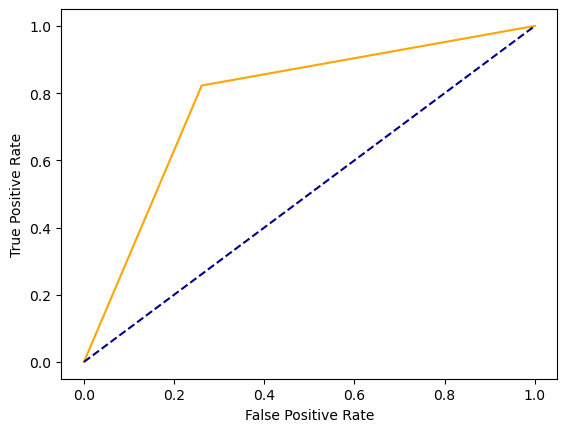

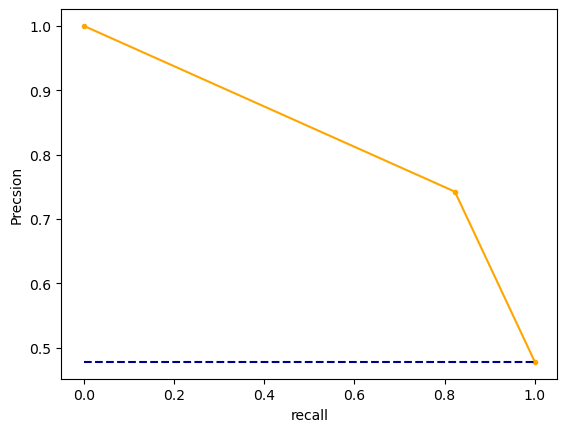

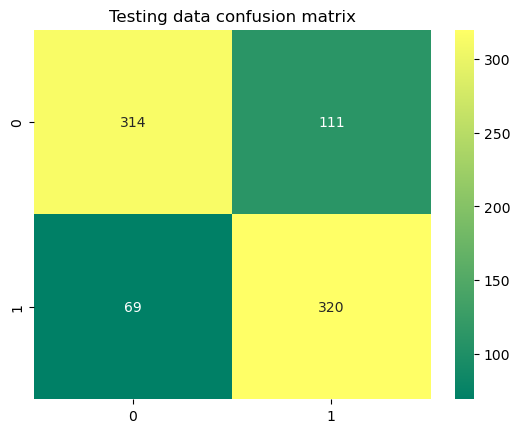

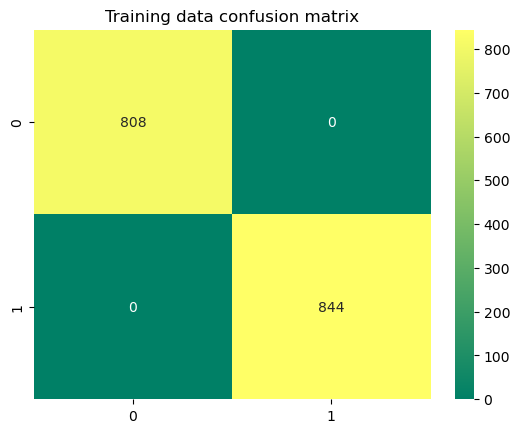

In [40]:
roc_pr_curve(dt_model,x_test,y_test,x_train,y_train)

### Hyper Parameter Tuning

Best Parameters : {'ccp_alpha': 0, 'max_depth': 20, 'max_features': 'auto', 'random_state': 24, 'splitter': 'best'}
.....................................
Accuracy on training set : 1.0 
Accuracy on testing set : 0.7874692874692875 
..........Testing Data Precision and Recall.......................

 Precsion of model : 0.7523364485981309

 Recall of model : 0.8277634961439588

 F_Score of model : 0.788249694002448

 ROC_AUC =78.92%


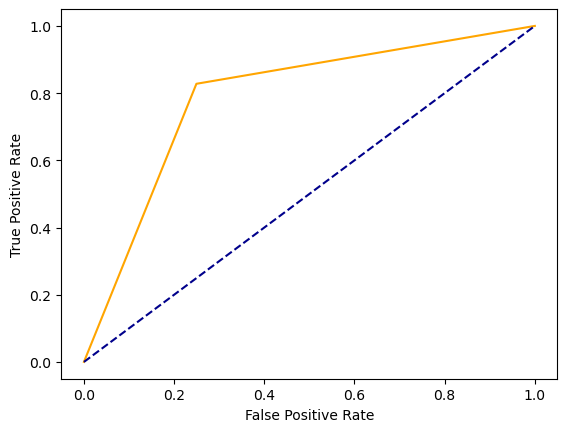

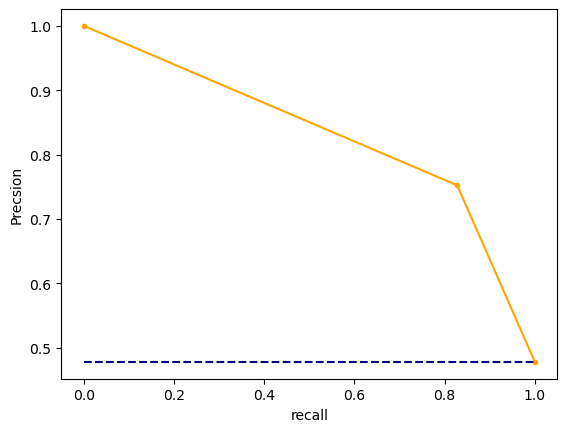

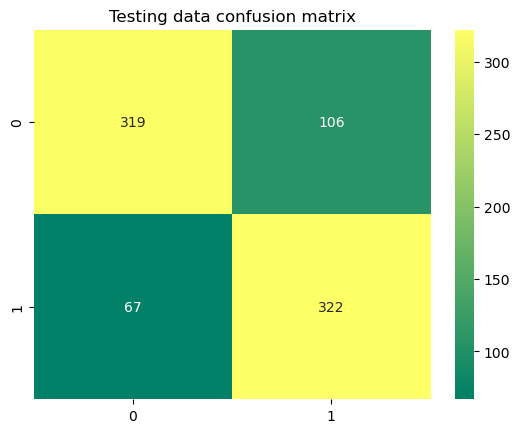

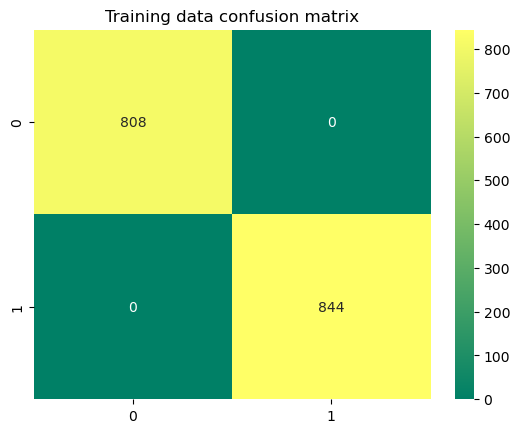

In [41]:
hyper_decision_tree=DecisionTreeClassifier()

import warnings

 
warnings.filterwarnings("ignore")

decision_tree_params ={
    "splitter":['best','random'],
    "max_depth":[5,10,15,20,25,30,40,50],
    "max_features":["auto","sqrt","log2"],
    "random_state":[24],
    "ccp_alpha":[0,0.2,0.3,0.5,0.8,1]
}
decision_tree_cv = GridSearchCV(hyper_decision_tree,param_grid=decision_tree_params,cv=5,scoring="accuracy")

decision_tree_cv.fit(x_train,y_train)

print("Best Parameters :" , decision_tree_cv.best_params_)

print(".....................................")

roc_pr_curve(decision_tree_cv,x_test,y_test,x_train,y_train)


In [42]:
from sklearn.preprocessing import StandardScaler

# Assuming x_train and x_test are your training and testing data
scaler = StandardScaler()

# Fit the scaler on training data and transform both training and testing data
x_train_scaled = scaler.fit_transform(x_train_selected)
x_test_scaled = scaler.transform(x_test_selected)

Accuracy on training set : 1.0 
Accuracy on testing set : 0.7874692874692875 
..........Testing Data Precision and Recall.......................

 Precsion of model : 0.7535211267605634

 Recall of model : 0.8251928020565553

 F_Score of model : 0.7877300613496933

 ROC_AUC =78.91%


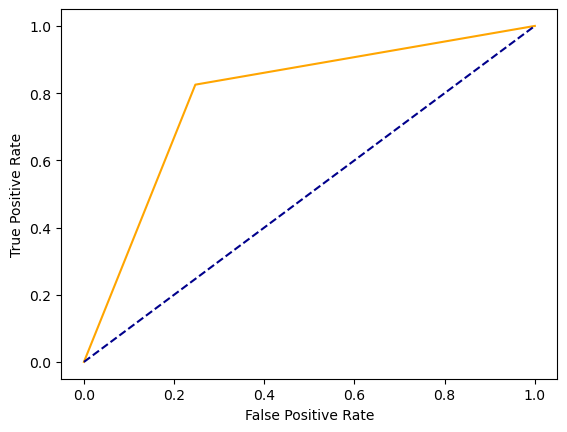

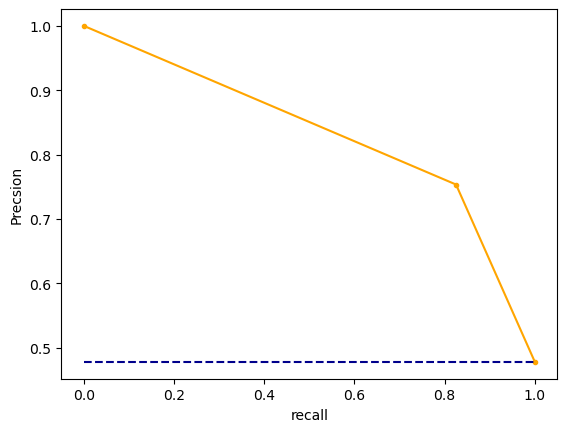

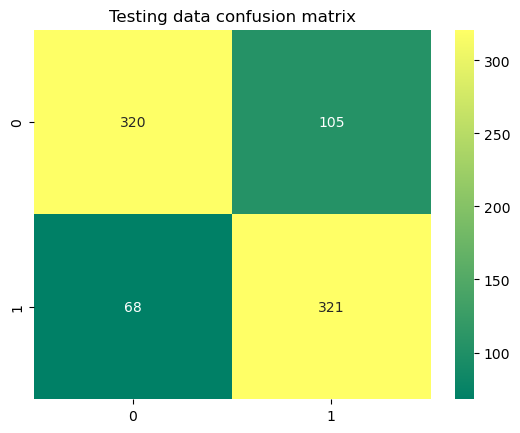

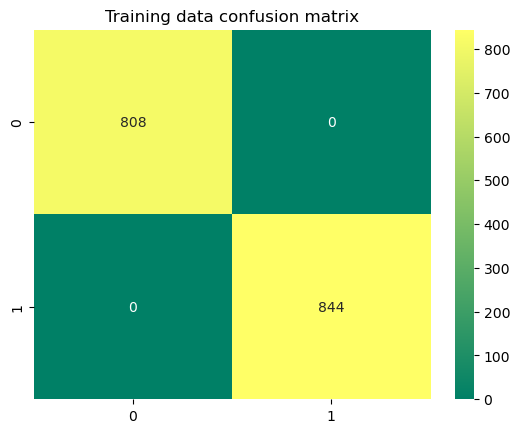

In [43]:
scaled_model = DecisionTreeClassifier()
scaled_model.fit(x_train_scaled,y_train)
roc_pr_curve(scaled_model,x_test_scaled,y_test,x_train_scaled,y_train)

Best Parameters : {'ccp_alpha': 0, 'max_depth': 20, 'max_features': 'auto', 'random_state': 24, 'splitter': 'best'}

# Orginal Training and Testing without any changes

Accuracy on training set : 1.0 

Accuracy on testing set : 0.8181818181818182 

..........Testing Data Precision and Recall.......................

 Precsion of model : 0.7875894988066826

 Recall of model : 0.8483290488431876

 F_Score of model : 0.8168316831683168

 ROC_AUC =81.95%


# RFE and Hyperparameter tuned Results
.....................................

Accuracy on training set : 1.0 

Accuracy on testing set : 0.7604422604422605 

..........Testing Data Precision and Recall.......................

 Precsion of model : 0.7309523809523809

 Recall of model : 0.7892030848329049

 F_Score of model : 0.7589616810877626

 ROC_AUC =76.17%

# RFE simple trained

Accuracy on training set : 1.0 

Accuracy on testing set : 0.7776412776412777 
..........Testing Data Precision and Recall.......................

 Precsion of model : 0.7464454976303317

 Recall of model : 0.8097686375321337

 F_Score of model : 0.7768187422934648

 ROC_AUC =77.90%
 
 # Scaled Data
 
Accuracy on training set : 1.0 
 
Accuracy on testing set : 0.7997542997542998 

..........Testing Data Precision and Recall.......................

 Precsion of model : 0.7665094339622641

 Recall of model : 0.8354755784061697

 F_Score of model : 0.7995079950799507

 ROC_AUC =80.13%
 
 
 # Scaled and RFE
Accuracy on training set : 1.0 

Accuracy on testing set : 0.7874692874692875 

..........Testing Data Precision and Recall.......................

 Precsion of model : 0.7596153846153846

 Recall of model : 0.8123393316195373

 F_Score of model : 0.7850931677018633

 ROC_AUC =78.85%
 

# Conclusions 

* The Highest Accuracy,Recall and Precision ,AUC was given by the model with no hyperparameter tunning and Feature Elimination

## Inference

Decision Trees and Random Forest Modelling is not affected by scaling of the data 

So we will be implementing the same for RAndom Forest model

Whereas For Logistic Regression model Scalling the data could have a greater impact


# ............................................................................................................................
## .................................................................................................................................................
### ..............................................................................................................................................................................

# Random Forest 

Accuracy on training set : 1.0 
Accuracy on testing set : 0.914004914004914 
..........Testing Data Precision and Recall.......................

 Precsion of model : 0.920844327176781

 Recall of model : 0.897172236503856

 F_Score of model : 0.9088541666666666

 ROC_AUC =96.93%


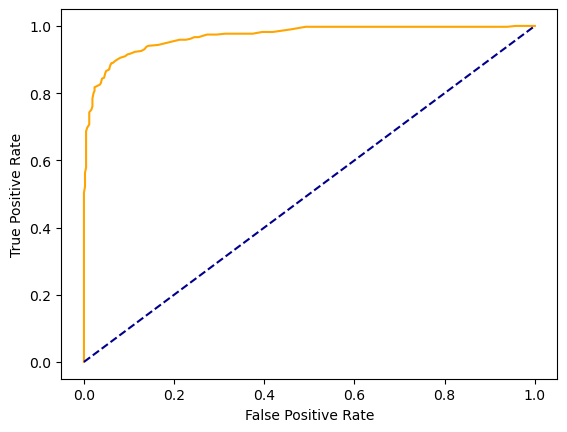

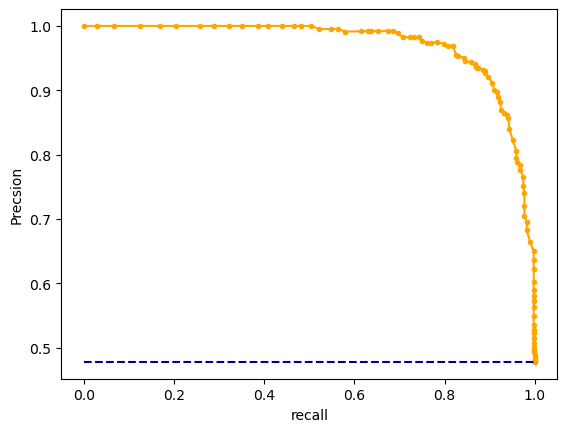

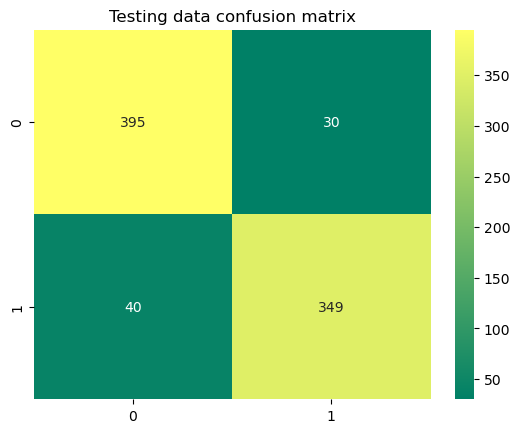

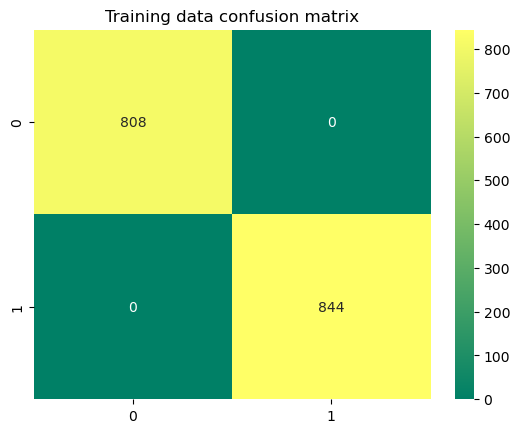

In [44]:
forest_model = RandomForestClassifier()
forest_model.fit(x_train,y_train)
roc_pr_curve(forest_model,x_test,y_test,x_train,y_train)

# Inference 

Random Forest Model is giving a very good accuracy

But we have greater False Negatives for out problem statment our focus should be to lower this because

These employees are predicted to leave the company but in reality they are loyal to the company
This could impact the employee morale

# ............................................................................................................................
## .................................................................................................................................................
### ..............................................................................................................................................................................

# Logistic Regression


Accuracy on training set : 0.7239709443099274 
Accuracy on testing set : 0.7162162162162162 
..........Testing Data Precision and Recall.......................

 Precsion of model : 0.701530612244898

 Recall of model : 0.7069408740359897

 F_Score of model : 0.7042253521126761

 ROC_AUC =78.66%


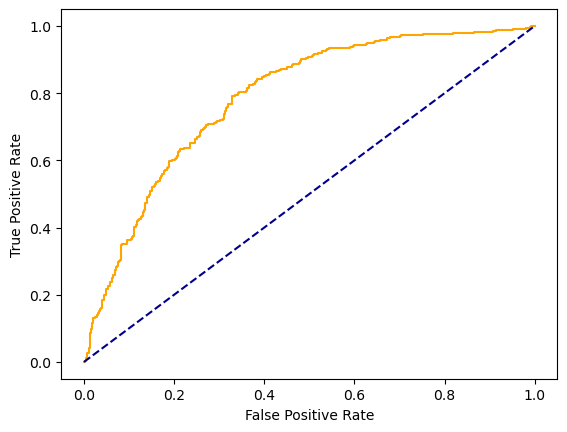

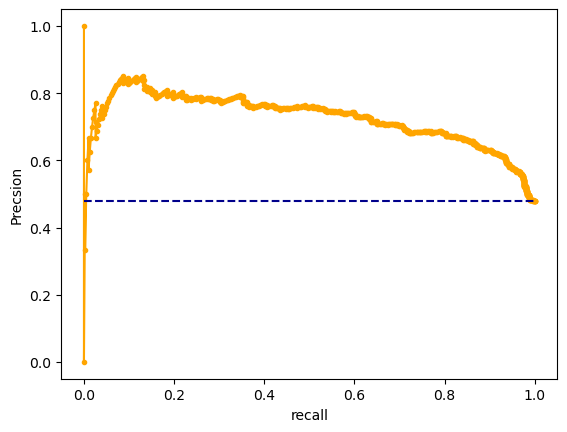

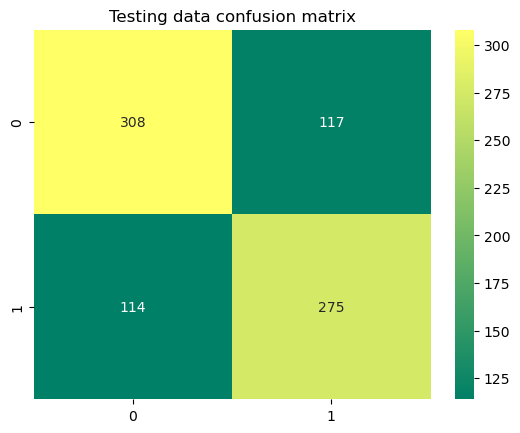

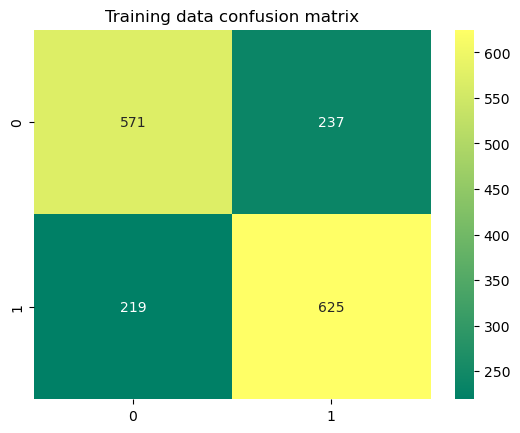

In [45]:
logimodel=LogisticRegression()
logimodel.fit(x_train,y_train)
roc_pr_curve(logimodel,x_test,y_test,x_train,y_train)

In [46]:
x_train_logi = scaler.fit_transform(x_train)
x_test_logi = scaler.transform(x_test)

Accuracy on training set : 0.8020581113801453 
Accuracy on testing set : 0.8046683046683046 
..........Testing Data Precision and Recall.......................

 Precsion of model : 0.7918781725888325

 Recall of model : 0.8020565552699229

 F_Score of model : 0.7969348659003832

 ROC_AUC =88.06%


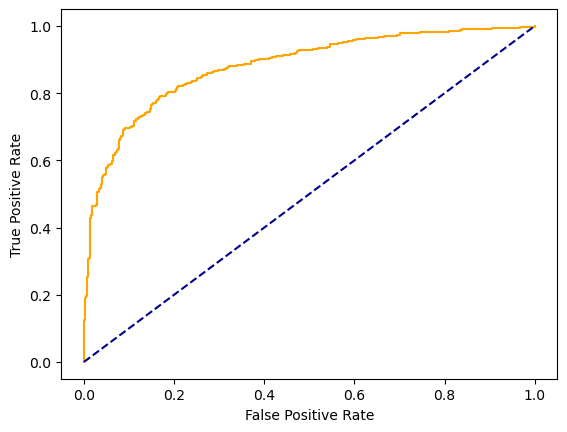

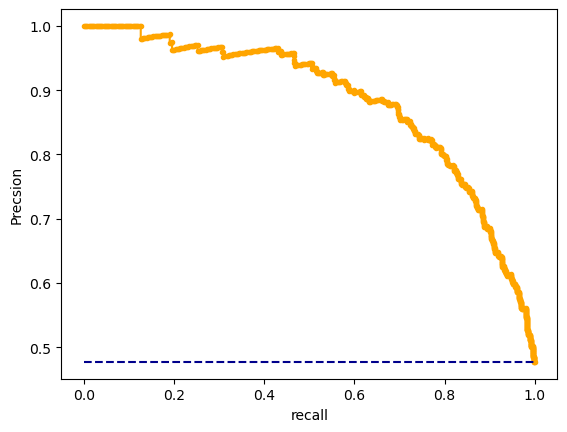

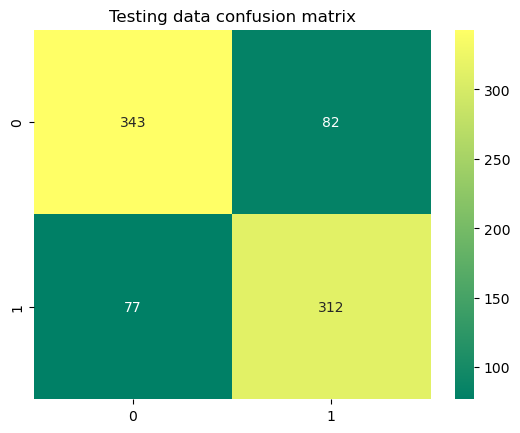

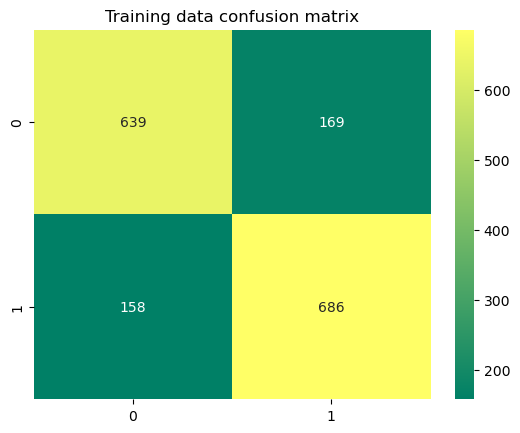

In [47]:
logimodel2=LogisticRegression()
logimodel2.fit(x_train_logi,y_train)
roc_pr_curve(logimodel,x_test_logi,y_test,x_train_logi,y_train)

.

# Conclusions

### Random Forest Model is giving the best results 